In [ ]:
!pip install yfinance
!pip install pandas_datareader

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import bs4 as bs
import pickle
import requests
import lxml
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})

    tickers = []

    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    print(tickers)

    return tickers

a = list(save_sp500_tickers())

['MMM\n', 'AOS\n', 'ABT\n', 'ABBV\n', 'ACN\n', 'ADBE\n', 'AMD\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'ABNB\n', 'AKAM\n', 'ALB\n', 'ARE\n', 'ALGN\n', 'ALLE\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'AON\n', 'APA\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ACGL\n', 'ADM\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'ADP\n', 'AZO\n', 'AVB\n', 'AVY\n', 'AXON\n', 'BKR\n', 'BALL\n', 'BAC\n', 'BK\n', 'BBWI\n', 'BAX\n', 'BDX\n', 'BRK.B\n', 'BBY\n', 'BIO\n', 'TECH\n', 'BIIB\n', 'BLK\n', 'BX\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BRO\n', 'BF.B\n', 'BLDR\n', 'BG\n', 'CDNS\n', 'CZR\n', 'CPT\n', 'CPB\n', 'COF\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CTLT\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'COR\n', 'CNC\n', 'CNP\n', 'CF\n', 'CHRW\n', 'CRL\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 'CB\n', 'CHD\n', 'C

In [ ]:
start_date = '2020-01-01'
end_date = '2024-01-01'
all_stock_prices = pd.DataFrame()

In [ ]:
for ticker in a:
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        all_stock_prices[ticker] = stock_data['Adj Close']
    except:
        print(f"Unable to fetch data for {ticker}")

# Calculate daily returns for each stock
returns = all_stock_prices.pct_change().dropna()

# Calculate expected return and standard deviation for each stock
expected_returns = returns.mean()
volatility = returns.std()

# Print the results
for ticker in save_sp500_tickers:
    print(f"Stock: {ticker}, Expected Return: {expected_returns[ticker]:.4f}, Standard Deviation: {volatility[ticker]:.4f}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

TypeError: 'function' object is not iterable

In [ ]:
# prompt: set date as column, which is index


In [ ]:
# prompt: create a column with date and get values from


In [ ]:
dailyreturnstable = pd.DataFrame(columns=all_stock_prices.columns)


for i in all_stock_prices.columns:
    dailyreturns = all_stock_prices[i].pct_change().dropna()
    dailyreturnstable[i] = dailyreturns


dailyreturnstable = dailyreturnstable.round(4)

dailyreturnstable.head()


,MMM\n,AOS\n,ABT\n,ABBV\n,ACN\n,ADBE\n,AMD\n,AES\n,AFL\n,A\n,...,WTW\n,GWW\n,WYNN\n,XEL\n,XYL\n,YUM\n,ZBRA\n,ZBH\n,ZION\n,ZTS\n
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.0086,-0.0088,-0.0122,-0.0095,-0.0017,-0.0078,-0.0102,-0.0115,-0.0069,-0.0161,...,0.0002,-0.0117,-0.0148,0.0048,0.0059,-0.0031,-0.0119,-0.0026,-0.0141,0.0001
2020-01-06,0.0010,0.0063,0.0052,0.0079,-0.0065,0.0057,-0.0043,0.0116,-0.0028,0.0030,...,0.0012,-0.0093,-0.0020,-0.0014,-0.0065,-0.0006,0.0077,-0.0058,-0.0122,-0.0077
2020-01-07,-0.0040,-0.0067,-0.0056,-0.0057,-0.0216,-0.0010,-0.0029,0.0035,-0.0095,0.0031,...,-0.0021,0.0010,0.0047,-0.0021,-0.0038,0.0018,-0.0060,-0.0009,-0.0061,0.0034
2020-01-08,0.0153,-0.0015,0.0041,0.0071,0.0020,0.0134,-0.0087,-0.0020,0.0031,0.0099,...,0.0011,0.0106,0.0063,-0.0010,0.0034,0.0018,-0.0344,0.0120,0.0099,-0.0022
2020-01-09,0.0032,-0.0044,0.0027,0.0077,0.0089,0.0076,0.0238,0.0100,0.0002,0.0157,...,0.0030,0.0052,-0.0042,0.0022,0.0045,0.0079,-0.0046,-0.0066,0.0066,0.0133


In [ ]:
expected_returns = dailyreturnstable.mean()

# Calculate the standard deviation for each stock
volatility = dailyreturnstable.std()

# Create a new DataFrame to store the results
statistics_table = pd.DataFrame({
    'Expected Return': expected_returns,
    'Standard Deviation': volatility
})

# Optionally, you can round the values to a specific number of decimal places
statistics_table = statistics_table.round(4)

# Display the table with expected returns and standard deviations
statistics_table

,Expected Return,Standard Deviation
MMM\n,-0.0002,0.0179
AOS\n,0.0008,0.0199
ABT\n,0.0005,0.0175
ABBV\n,0.0008,0.0158
ACN\n,0.0007,0.0192
...,...,...
YUM\n,0.0005,0.0176
ZBRA\n,0.0004,0.0266
ZBH\n,0.0001,0.0210
ZION\n,0.0005,0.0321


In [ ]:
# prompt: count the no of positive and negative values from stats table with respect to expected returns'

statistics_table.loc[statistics_table['Expected Return'] > 0].shape[0]


464

In [ ]:
b=pd.DataFrame(statistics_table['Expected Return']>0)
b[b['Expected Return']==False].count()

Expected Return    39
dtype: int64

In [ ]:
464+37

501

In [ ]:
statistics_table.dropna(inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
statistics_table

,Expected Return,Standard Deviation
MMM\n,-0.0002,0.0179
AOS\n,0.0008,0.0199
ABT\n,0.0005,0.0175
ABBV\n,0.0008,0.0158
ACN\n,0.0007,0.0192
...,...,...
YUM\n,0.0005,0.0176
ZBRA\n,0.0004,0.0266
ZBH\n,0.0001,0.0210
ZION\n,0.0005,0.0321


In [ ]:
SS = StandardScaler()
ScaledData = pd.DataFrame(SS.fit_transform(statistics_table), columns = statistics_table.columns)
ScaledData

,Expected Return,Standard Deviation
0,-1.668081,-0.901485
1,0.281321,-0.595067
2,-0.303500,-0.962768
3,0.281321,-1.223223
4,0.086381,-0.702313
...,...,...
496,-0.303500,-0.947447
497,-0.498440,0.431431
498,-1.083260,-0.426538
499,-0.303500,1.274078


In [ ]:
ScaledData.dropna(inplace = True)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 100)
kmeans.fit(ScaledData)
predict = kmeans.predict(ScaledData)

In [ ]:
kmeans.labels_

array([2, 0, 2, 0, 0, 0, 1, 3, 0, 0, 2, 3, 2, 1, 2, 3, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 3, 2, 0, 3, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 3, 0, 0,
       1, 0, 2, 2, 2, 3, 0, 0, 2, 0, 1, 3, 2, 2, 2, 1, 2, 2, 3, 2, 0, 3,
       0, 1, 3, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 3, 0, 3, 3, 1,
       3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2, 1, 1, 1, 2, 3, 2, 0, 2, 0, 2, 0,
       1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 3, 3, 1, 0, 0, 2,
       2, 2, 1, 0, 2, 2, 2, 3, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 3, 1, 2, 2,
       2, 2, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 0, 3, 0, 0, 2, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 3, 3, 0, 0, 0, 3, 2,
       0, 2, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 0, 0, 0, 3, 2, 0, 0, 0, 1, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 2, 3, 2, 1, 2, 0, 2, 0, 1, 0, 3, 2,
       1, 0, 3, 0, 2, 0, 0, 0, 3, 3, 1, 1, 2, 3, 0,

In [ ]:
statistics_table['Cluster'] = kmeans.labels_

In [ ]:
statistics_table

,Expected Return,Standard Deviation,Cluster
MMM\n,-0.0002,0.0179,2
AOS\n,0.0008,0.0199,0
ABT\n,0.0005,0.0175,2
ABBV\n,0.0008,0.0158,0
ACN\n,0.0007,0.0192,0
...,...,...,...
YUM\n,0.0005,0.0176,2
ZBRA\n,0.0004,0.0266,3
ZBH\n,0.0001,0.0210,2
ZION\n,0.0005,0.0321,3


In [ ]:
statistics_table.groupby('Cluster').describe()

Expected Return                                                      \
                  count      mean       std     min     25%     50%     75%   
Cluster                                                                       
0                 194.0  0.000808  0.000226  0.0005  0.0006  0.0008  0.0009   
1                  50.0  0.001690  0.000452  0.0010  0.0014  0.0016  0.0018   
2                 172.0  0.000227  0.000273 -0.0011  0.0001  0.0003  0.0004   
3                  85.0  0.000568  0.000326 -0.0004  0.0004  0.0006  0.0008   

                Standard Deviation                                      \
            max              count      mean       std     min     25%   
Cluster                                                                  
0        0.0017              194.0  0.021567  0.002671  0.0150  0.0195   
1        0.0031               50.0  0.034106  0.007111  0.0238  0.0289   
2        0.0006              172.0  0.019645  0.003211  0.0130  0.0176   
3        0.0011               85.0  0.031148  0.004741  0.0255  0.0281   

                                   
             50%      75%     max  
Cluster                            
0        0.02145  0.02350  0.0274  
1        0.03330  0.03960  0.0507  
2        0.01940  0.02145  0.0302  
3        0.03030  0.03310  0.0532

In [ ]:
# Our CLuster of interest is Cluster 1
selected_stocks_1 = statistics_table[statistics_table['Cluster'] == 0]
selected_stocks_1.drop('Cluster', axis = 1, inplace = True)
selected_stocks_1.count()

Expected Return       194
Standard Deviation    194
dtype: int64

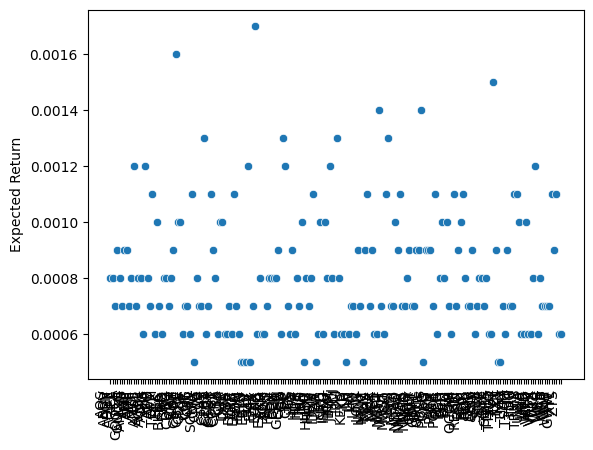

In [ ]:
sns.scatterplot(selected_stocks_1['Expected Return'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
c=pd.DataFrame(kmeans.cluster_centers_,columns=[['Expected Returns','STD']])


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# ...

# Specify the path where you want to save the Excel file
excel_file_path = 'your_file_path1.xlsx'

# Write the DataFrame to an Excel file
all_stock_prices.to_excel(excel_file_path, index=False)

print(f'DataFrame successfully written to {excel_file_path}')


DataFrame successfully written to your_file_path1.xlsx


In [ ]:
c.head()

,Expected Returns,STD
0,0.296394,-0.339667
1,2.016289,1.581415
2,-0.836185,-0.634171
3,-0.170482,1.128260


In [ ]:
SS = StandardScaler()
ScaledData = pd.DataFrame(SS.fit_transform(selected_stocks_1), columns = selected_stocks_1.columns)
ScaledData

,Expected Return,Standard Deviation
0,-0.034299,-0.625679
1,-0.034299,-2.164533
2,-0.477906,-0.888411
3,0.409307,1.213439
4,-0.034299,0.049915
...,...,...
189,1.296519,0.087448
190,0.409307,0.913175
191,1.296519,-0.813345
192,-0.921512,-0.287882


In [ ]:
kmeans1 = KMeans(n_clusters = 4, random_state = 100)
kmeans.fit(ScaledData)
predict1 = kmeans1.fit_predict(ScaledData)

In [ ]:
kmeans1.labels_

array([1, 1, 1, 3, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       0, 0, 3, 1, 1, 0, 2, 2, 2, 1, 3, 0, 0, 2, 0, 3, 3, 0, 2, 1, 0, 2,
       1, 0, 0, 1, 3, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 3, 0, 2, 2, 0, 1, 3, 0, 0, 0, 3, 0, 0, 1, 3, 2,
       0, 1, 3, 1, 3, 3, 3, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 3, 0, 0,
       3, 1, 3, 0, 0, 2, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 0, 0, 3, 0, 0, 3,
       1, 2, 0, 1, 1, 1, 1, 3, 1, 0, 3, 3, 1, 0, 0, 2, 1, 3, 3, 2, 1, 0,
       0, 1, 1, 1, 3, 3, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 3, 1, 0, 2, 2, 3,
       1, 0, 3, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 3, 2, 0, 1], dtype=int32)

In [ ]:
selected_stocks_1['Cluster'] = kmeans.labels_
selected_stocks_1

,Expected Return,Standard Deviation,Cluster
AOS\n,0.0008,0.0199,1
ABBV\n,0.0008,0.0158,1
ACN\n,0.0007,0.0192,1
ADBE\n,0.0009,0.0248,3
AFL\n,0.0008,0.0217,0
...,...,...,...
WST\n,0.0011,0.0218,2
WMB\n,0.0009,0.0240,3
GWW\n,0.0011,0.0194,2
XYL\n,0.0006,0.0208,0


In [ ]:
selected_stocks_1.groupby('Cluster').describe()

Expected Return                                                      \
                  count      mean       std     min     25%     50%     75%   
Cluster                                                                       
0                  70.0  0.000661  0.000107  0.0005  0.0006  0.0007  0.0007   
1                  63.0  0.000735  0.000123  0.0006  0.0006  0.0007  0.0008   
2                  27.0  0.001215  0.000177  0.0010  0.0011  0.0011  0.0013   
3                  34.0  0.000921  0.000132  0.0007  0.0008  0.0009  0.0010   

                Standard Deviation                                        \
            max              count      mean       std     min       25%   
Cluster                                                                    
0        0.0009               70.0  0.022530  0.001341  0.0207  0.021425   
1        0.0010               63.0  0.018751  0.001338  0.0150  0.017850   
2        0.0017               27.0  0.021085  0.001698  0.0174  0.020200   
3        0.0012               34.0  0.025185  0.001244  0.0227  0.024175   

                                    
             50%       75%     max  
Cluster                             
0        0.02225  0.023500  0.0257  
1        0.01880  0.019700  0.0211  
2        0.02110  0.022400  0.0237  
3        0.02520  0.026075  0.0274

In [ ]:
# Cluster 0 is our point of interest now.
# And we'll be using the stocks in this cluster to further our analysis

In [ ]:
selected_shape_2 = selected_stocks_1[selected_stocks_1['Cluster'] == 0]

In [ ]:
selected_shape_2

,Expected Return,Standard Deviation,Cluster
AFL\n,0.0008,0.0217,0
AMZN\n,0.0007,0.0237,0
ADI\n,0.0008,0.0229,0
ANSS\n,0.0006,0.0243,0
ACGL\n,0.0008,0.0228,0
...,...,...,...
VRTX\n,0.0008,0.0210,0
VICI\n,0.0007,0.0237,0
VMC\n,0.0007,0.0224,0
WAB\n,0.0007,0.0228,0


In [ ]:
selected_shape_3 = selected_stocks_1[selected_stocks_1['Cluster'] == 1]

In [ ]:
selected_shape_3

,Expected Return,Standard Deviation,Cluster
AOS\n,0.0008,0.0199,1
ABBV\n,0.0008,0.0158,1
ACN\n,0.0007,0.0192,1
A\n,0.0007,0.0192,1
GOOGL\n,0.0009,0.0211,1
...,...,...,...
UPS\n,0.0006,0.0196,1
UNH\n,0.0008,0.0192,1
VRSK\n,0.0006,0.0177,1
WRB\n,0.0007,0.0198,1


In [ ]:
selected_shape_4 = selected_stocks_1[selected_stocks_1['Cluster'] == 2]

In [ ]:
selected_shape_5 = selected_stocks_1[selected_stocks_1['Cluster'] == 3]

In [ ]:
selected_shape_4

,Expected Return,Standard Deviation,Cluster
AAPL\n,0.0012,0.0211,2
AJG\n,0.0011,0.0174,2
CDNS\n,0.0016,0.0237,2
CAH\n,0.0010,0.0199,2
CAT\n,0.0010,0.0214,2
COR\n,0.0011,0.0176,2
CMG\n,0.0013,0.0235,2
CTAS\n,0.0011,0.0208,2
DE\n,0.0011,0.0221,2
ETN\n,0.0012,0.0215,2


In [ ]:
selected_shape_5.index

Index(['ADBE\n', 'AXP\n', 'AMP\n', 'BKNG\n', 'CBRE\n', 'CRL\n', 'SCHW\n',
       'CTRA\n', 'FDX\n', 'GE\n', 'HCA\n', 'HPQ\n', 'IDXX\n', 'IR\n', 'IPG\n',
       'INTU\n', 'LKQ\n', 'LULU\n', 'MLM\n', 'MS\n', 'MSCI\n', 'NWS\n',
       'NVR\n', 'PH\n', 'POOL\n', 'PFG\n', 'QCOM\n', 'RJF\n', 'CRM\n', 'STX\n',
       'TXT\n', 'TDG\n', 'ULTA\n', 'WMB\n'],
      dtype='object')

In [ ]:
import numpy as np
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yfm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
df = yf.download(['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD'],start="2019-01-01", end="2024-01-01")
df.head()

[*********************100%%**********************]  7 of 7 completed


Price       Adj Close                                                          \
Ticker           ANET        AVGO       NVDA       PANW        PWR       STLD   
Date                                                                            
2019-01-02  52.637501  214.786316  33.790482  61.070000  29.459816  27.052765   
2019-01-03  49.900002  195.680878  31.748960  59.900002  29.095503  26.617432   
2019-01-04  50.617500  197.604065  33.783031  61.463333  30.690584  28.021154   
2019-01-07  52.480000  201.628555  35.571533  62.450001  30.808744  28.314337   
2019-01-08  53.570000  200.010284  34.685966  63.476665  31.281361  29.256073   

Price                      Close                         ...       Open  \
Ticker           TSLA       ANET        AVGO       NVDA  ...        PWR   
Date                                                     ...              
2019-01-02  20.674667  52.637501  253.509995  34.055000  ...  29.639999   
2019-01-03  20.024000  49.900002  230.960007  31.997499  ...  29.990000   
2019-01-04  21.179333  50.617500  233.229996  34.047501  ...  30.129999   
2019-01-07  22.330667  52.480000  237.979996  35.849998  ...  31.059999   
2019-01-08  22.356667  53.570000  236.070007  34.957500  ...  31.629999   

Price                              Volume                              \
Ticker           STLD       TSLA     ANET     AVGO      NVDA     PANW   
Date                                                                    
2019-01-02  29.160000  20.406668  2608400  3034600  50875200  4432800   
2019-01-03  30.230000  20.466667  3202400  6858000  70555200  3113700   
2019-01-04  30.650000  20.400000  4740000  5424800  58562000  3366900   
2019-01-07  31.799999  21.448000  5283200  5343300  70916000  3500400   
2019-01-08  32.889999  22.797333  3055600  3679500  78601600  3288300   

Price                                    
Ticker          PWR     STLD       TSLA  
Date                                     
2019-01-02  1560700  2086800  174879000  
2019-01-03  1649800  1762000  104478000  
2019-01-04  1326500  2256500  110911500  
2019-01-07  1512000  3250100  113268000  
2019-01-08  1286600  3829200  105127500  

[5 rows x 42 columns]

In [ ]:
df.isnull().sum()

Price      Ticker
Adj Close  ANET      0
           AVGO      0
           NVDA      0
           PANW      0
           PWR       0
           STLD      0
           TSLA      0
Close      ANET      0
           AVGO      0
           NVDA      0
           PANW      0
           PWR       0
           STLD      0
           TSLA      0
High       ANET      0
           AVGO      0
           NVDA      0
           PANW      0
           PWR       0
           STLD      0
           TSLA      0
Low        ANET      0
           AVGO      0
           NVDA      0
           PANW      0
           PWR       0
           STLD      0
           TSLA      0
Open       ANET      0
           AVGO      0
           NVDA      0
           PANW      0
           PWR       0
           STLD      0
           TSLA      0
Volume     ANET      0
           AVGO      0
           NVDA      0
           PANW      0
           PWR       0
           STLD      0
           TSLA      0
dtype: int64

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date', ylabel='Close'>

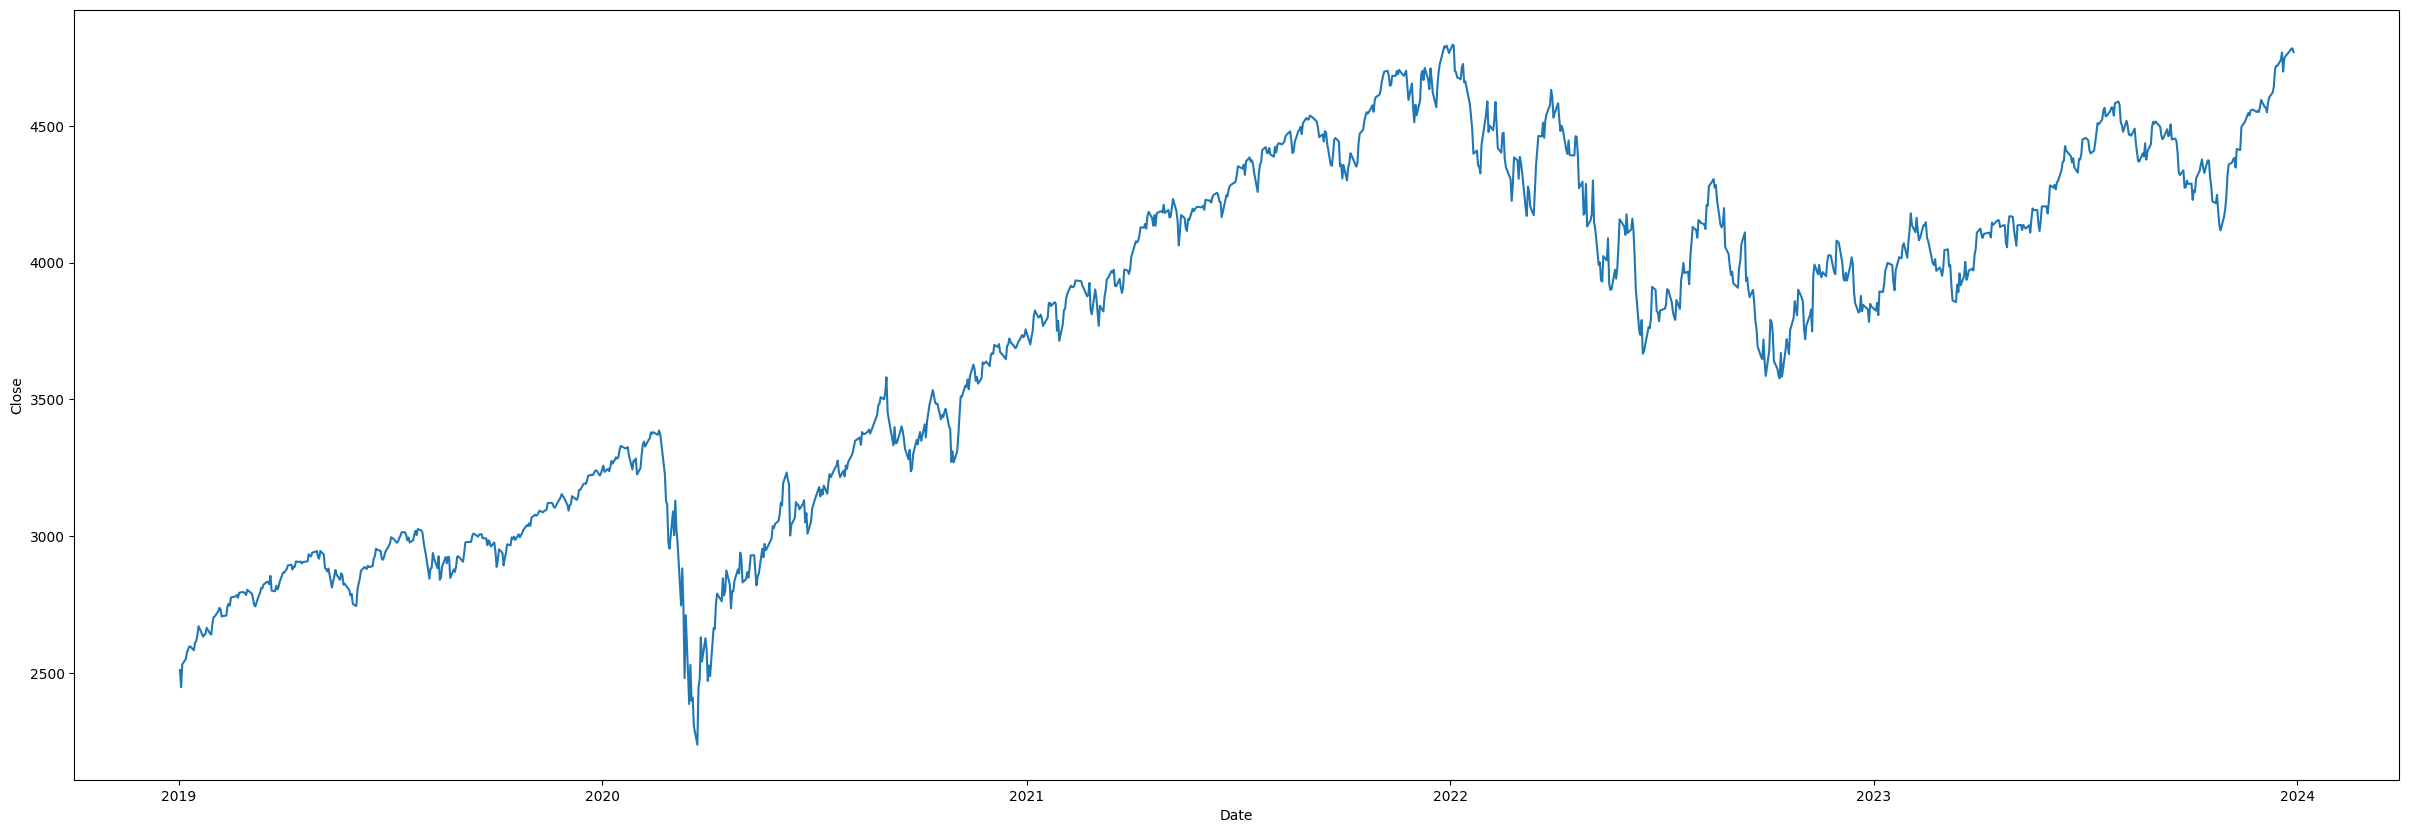

In [ ]:
df_SP500 = yf.download("^GSPC", start="2019-01-01", end="2024-01-01")
closingpricesMarket = df_SP500['Close']
plt.figure(figsize = (30,10))

sns.lineplot(closingpricesMarket)


<Axes: xlabel='Date'>

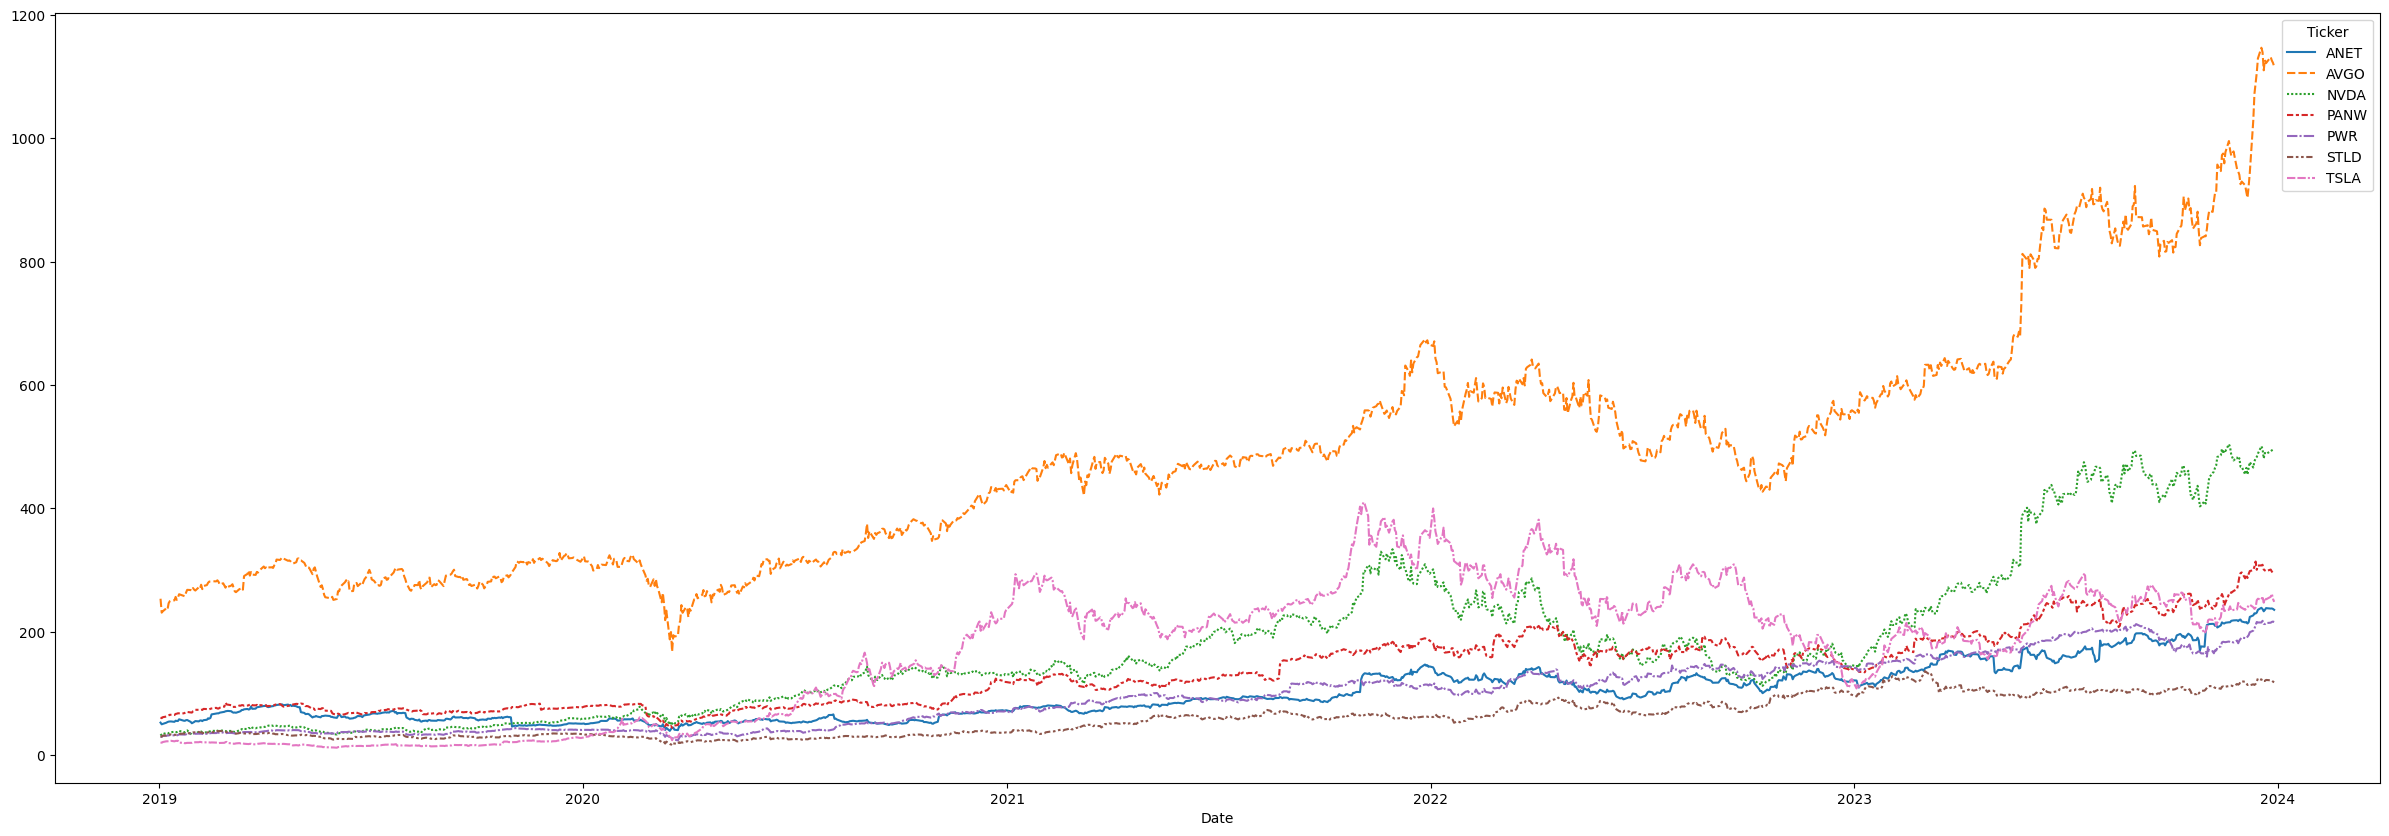

In [ ]:
closingprices = df['Close']

plt.figure(figsize = (30,10))

sns.lineplot(closingprices)

In [ ]:
stocks =[ 'ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD',"^GSPC"]


In [ ]:
ClosingStockPricesALL = yf.download(['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD',"^GSPC"],start="2019-01-01", end="2024-01-01")
x = ClosingStockPricesALL['Close']
x.head()

[*********************100%%**********************]  8 of 8 completed


Ticker,ANET,AVGO,NVDA,PANW,PWR,STLD,TSLA,^GSPC
Date,,,,,,,,
2019-01-02,52.637501,253.509995,34.055000,61.070000,29.920000,30.450001,20.674667,2510.030029
2019-01-03,49.900002,230.960007,31.997499,59.900002,29.549999,29.959999,20.024000,2447.889893
2019-01-04,50.617500,233.229996,34.047501,61.463333,31.170000,31.540001,21.179333,2531.939941
2019-01-07,52.480000,237.979996,35.849998,62.450001,31.290001,31.870001,22.330667,2549.689941
2019-01-08,53.570000,236.070007,34.957500,63.476665,31.770000,32.930000,22.356667,2574.409912


In [ ]:
daily_returns = ClosingStockPricesALL['Close'].pct_change()
daily_returns.drop(daily_returns.index[0], inplace=True)
daily_returns

Ticker,ANET,AVGO,NVDA,PANW,PWR,STLD,TSLA,^GSPC
Date,,,,,,,,
2019-01-03,-0.052007,-0.088951,-0.060417,-0.019158,-0.012366,-0.016092,-0.031472,-0.024757
2019-01-04,0.014379,0.009828,0.064068,0.026099,0.054822,0.052737,0.057697,0.034336
2019-01-07,0.036796,0.020366,0.052941,0.016053,0.003850,0.010463,0.054361,0.007010
2019-01-08,0.020770,-0.008026,-0.024895,0.016440,0.015340,0.033260,0.001164,0.009695
2019-01-09,0.012460,0.043250,0.019667,0.014073,0.001259,0.005162,0.009483,0.004098
...,...,...,...,...,...,...,...,...
2023-12-22,0.012408,-0.004710,-0.003266,-0.003975,0.007484,0.013728,-0.007701,0.001660
2023-12-26,-0.003064,0.008833,0.009195,0.008752,0.002897,-0.004842,0.016116,0.004232
2023-12-27,0.000842,-0.005053,0.002800,-0.011037,0.006009,-0.002887,0.018822,0.001430


<Axes: xlabel='Ticker', ylabel='Ticker'>

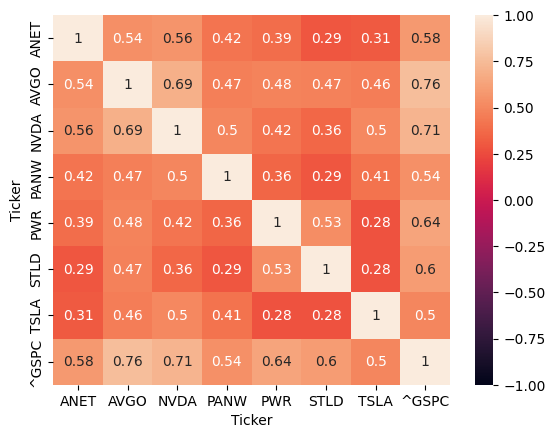

In [ ]:
sns.heatmap(daily_returns.corr(), annot = True, vmax=1, vmin=-1)

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, ANET)  1258 non-null   float64
 1   (Adj Close, AVGO)  1258 non-null   float64
 2   (Adj Close, NVDA)  1258 non-null   float64
 3   (Adj Close, PANW)  1258 non-null   float64
 4   (Adj Close, PWR)   1258 non-null   float64
 5   (Adj Close, STLD)  1258 non-null   float64
 6   (Adj Close, TSLA)  1258 non-null   float64
 7   (Close, ANET)      1258 non-null   float64
 8   (Close, AVGO)      1258 non-null   float64
 9   (Close, NVDA)      1258 non-null   float64
 10  (Close, PANW)      1258 non-null   float64
 11  (Close, PWR)       1258 non-null   float64
 12  (Close, STLD)      1258 non-null   float64
 13  (Close, TSLA)      1258 non-null   float64
 14  (High, ANET)       1258 non-null   float64
 15  (High, AVGO)       1258 non-null   float64
 16  (High,

In [ ]:
import yfinance as yf
import pandas as pd

# List of stock symbols
stocks = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD']

# Create an empty DataFrame to store the historical data
df_combined = pd.DataFrame()

# Loop through each stock symbol
for stock_symbol in stocks:
    # Retrieve historical data for the current stock
    stock_data = yf.Ticker(stock_symbol).history(period='5y')

    # Add a column to store the stock symbol
    stock_data['Symbol'] = stock_symbol

    # Concatenate the data for the current stock to the combined DataFrame
    df_combined = pd.concat([df_combined, stock_data])

# Display the combined DataFrame
print(df_combined.head())


                                Open       High        Low      Close  \
Date                                                                    
2019-02-19 00:00:00-05:00  66.147499  68.180000  65.919998  67.394997   
2019-02-20 00:00:00-05:00  67.542503  68.703751  66.805000  67.680000   
2019-02-21 00:00:00-05:00  67.047501  67.967499  66.636497  67.625000   
2019-02-22 00:00:00-05:00  67.970001  68.837502  67.705002  68.742500   
2019-02-25 00:00:00-05:00  69.625000  70.752502  69.625000  69.824997   

                            Volume  Dividends  Stock Splits Symbol  
Date                                                                
2019-02-19 00:00:00-05:00  7644400        0.0           0.0   ANET  
2019-02-20 00:00:00-05:00  4514400        0.0           0.0   ANET  
2019-02-21 00:00:00-05:00  2758800        0.0           0.0   ANET  
2019-02-22 00:00:00-05:00  2985600        0.0           0.0   ANET  
2019-02-25 00:00:00-05:00  3497200        0.0           0.0   ANET  


In [ ]:
df_combined.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)
df_combined['Next Day Price'] = df_combined['Close'].shift(-1)
df_combined['Target'] = (df_combined['Next Day Price'] > df_combined['Close']).astype(int)
df_combined


,Open,High,Low,Close,Volume,Symbol,Next Day Price,Target
Date,,,,,,,,
2019-02-19 00:00:00-05:00,66.147499,68.180000,65.919998,67.394997,7644400,ANET,67.680000,1
2019-02-20 00:00:00-05:00,67.542503,68.703751,66.805000,67.680000,4514400,ANET,67.625000,0
2019-02-21 00:00:00-05:00,67.047501,67.967499,66.636497,67.625000,2758800,ANET,68.742500,1
2019-02-22 00:00:00-05:00,67.970001,68.837502,67.705002,68.742500,2985600,ANET,69.824997,1
2019-02-25 00:00:00-05:00,69.625000,70.752502,69.625000,69.824997,3497200,ANET,70.132500,1
...,...,...,...,...,...,...,...,...
2024-02-12 00:00:00-05:00,125.250000,126.150002,123.599998,123.809998,973100,STLD,118.370003,0
2024-02-13 00:00:00-05:00,121.610001,122.150002,117.430000,118.370003,1245700,STLD,119.739998,1
2024-02-14 00:00:00-05:00,118.989998,120.970001,118.169998,119.739998,906500,STLD,124.110001,1


In [ ]:
train = df_combined.iloc[:-100]
test = df_combined.iloc[-100:]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, precision_score, mean_absolute_error
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# List of stock symbols
stocks = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD']

# Create an empty DataFrame to store the historical data
df_combined = pd.DataFrame()

# Loop through each stock symbol
for stock_symbol in stocks:
    # Retrieve historical data for the current stock
    stock_data = yf.Ticker(stock_symbol).history(period='5y')

    # Add a column to store the stock symbol
    stock_data['Symbol'] = stock_symbol

    # Concatenate the data for the current stock to the combined DataFrame
    df_combined = pd.concat([df_combined, stock_data])

# Create a binary classification target variable (e.g., if Close price increases, label as 1, else label as 0)
df_combined['Target'] = (df_combined['Close'].shift(-1) > df_combined['Close']).astype(int)

# Drop NaN values introduced by creating the binary target variable
df_combined = df_combined.dropna()

# Choose a stock for analysis (e.g., 'ANET')
selected_stock = 'ANET'

# Features and target variable
X = df_combined[df_combined['Symbol'] == selected_stock][['Open', 'High', 'Low', 'Close']]
y = df_combined[df_combined['Symbol'] == selected_stock]['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an ARIMA model for the selected stock
model = ARIMA(y_train, order=(1, 1, 1))
results = model.fit()

# Get predictions
predictions = results.forecast(steps=len(X_test))

# Convert predictions to binary labels (1 or 0) based on some threshold (you may need to adjust this threshold)
threshold = 0.1
binary_predictions = (predictions > threshold).astype(int)

# Print the classification report
print(classification_report(y_test, binary_predictions, target_names=['Class 0', 'Class 1'], digits=4, zero_division=1))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

              precision    recall  f1-score   support

     Class 0     1.0000    0.0000    0.0000       121
     Class 1     0.5198    1.0000    0.6841       131

    accuracy                         0.5198       252
   macro avg     0.7599    0.5000    0.3420       252
weighted avg     0.7504    0.5198    0.3556       252



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
X_train = train[['Open', 'High', 'Low', 'Close']]
y_train = train['Target']
X_test = test[['Open', 'High', 'Low', 'Close']]
y_test = test['Target']

RF = RandomForestClassifier()
RF_Model = RF.fit(X_train,y_train)
RF_pred = RF.predict(X_test)
RF_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
report = classification_report(y_test, RF_pred)
print(report)

              precision    recall  f1-score   support

           0       0.39      0.40      0.39        43
           1       0.54      0.53      0.53        57

    accuracy                           0.47       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.47      0.47      0.47       100



[*********************100%%**********************]  8 of 8 completed


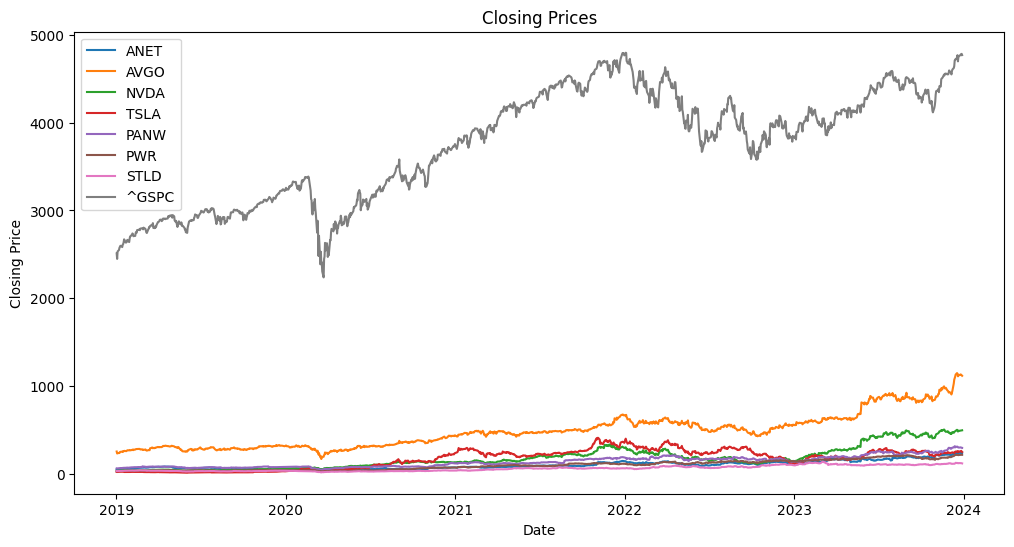

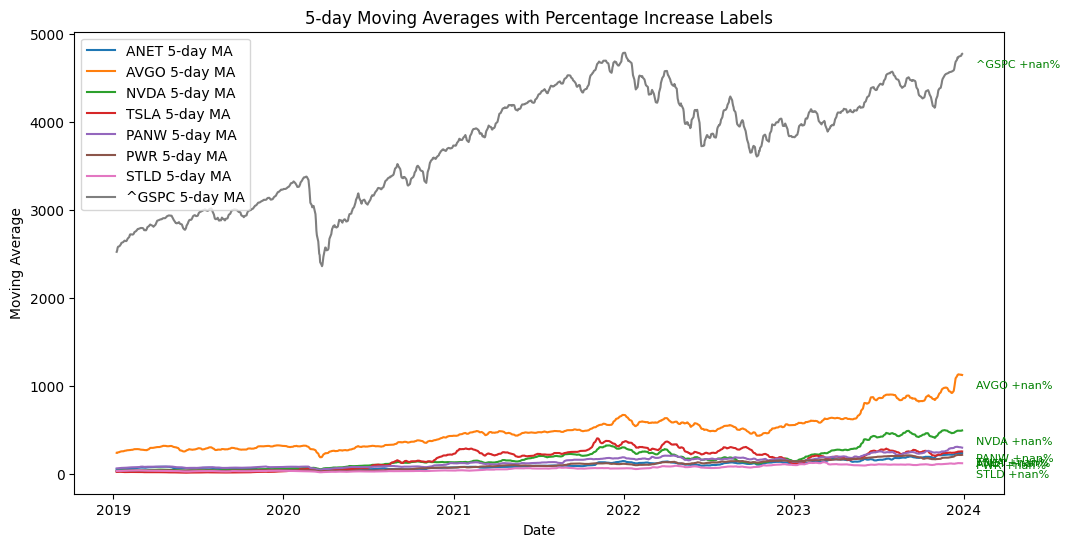

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock prices
tickers = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD', "^GSPC"]
closing_prices = yf.download(tickers, start="2019-01-01", end="2024-01-01")['Close']

# Calculate 5-day moving averages
ma_window = 5
moving_averages = closing_prices.rolling(window=ma_window).mean()

# Calculate future 5-day moving averages (shifted by 1 day for prediction)
future_moving_averages = moving_averages.shift(-1)

# Calculate percentage increase
percentage_increase = (future_moving_averages / moving_averages.shift(1) - 1) * 100

# Plotting
plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(closing_prices[ticker], label=ticker)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')

plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(moving_averages[ticker], label=f'{ticker} {ma_window}-day MA')

    # Annotate with percentage increase
    last_value = moving_averages[ticker].iloc[-1]
    percentage_inc = percentage_increase[ticker].iloc[-1]
    plt.annotate(f'{ticker} +{percentage_inc:.2f}%',
                 xy=(moving_averages.index[-1], last_value),
                 xytext=(10, -10),
                 textcoords='offset points',
                 fontsize=8,
                 color='red' if percentage_inc > 0 else 'green')

plt.title(f'{ma_window}-day Moving Averages with Percentage Increase Labels')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend(loc='upper left')

plt.show()


[*********************100%%**********************]  8 of 8 completed


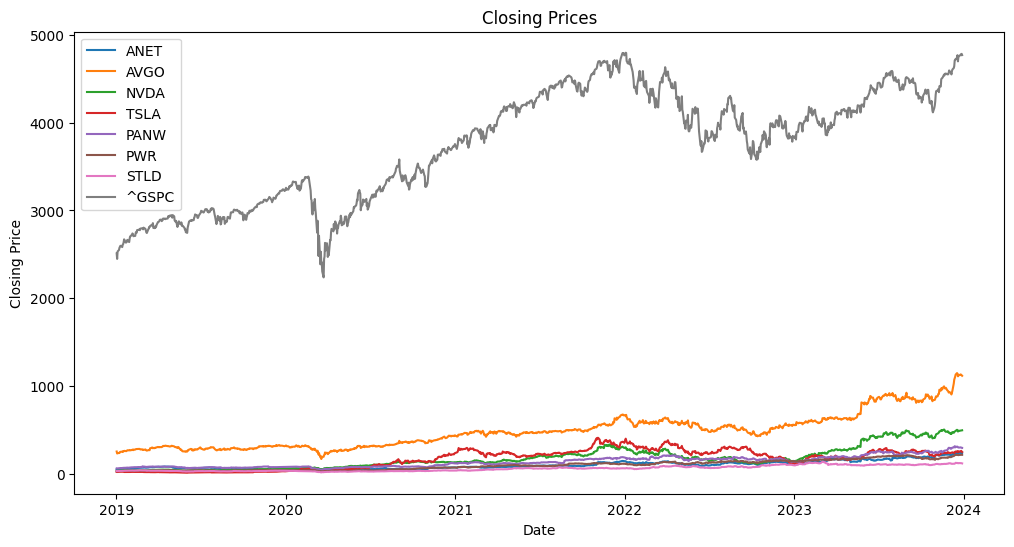

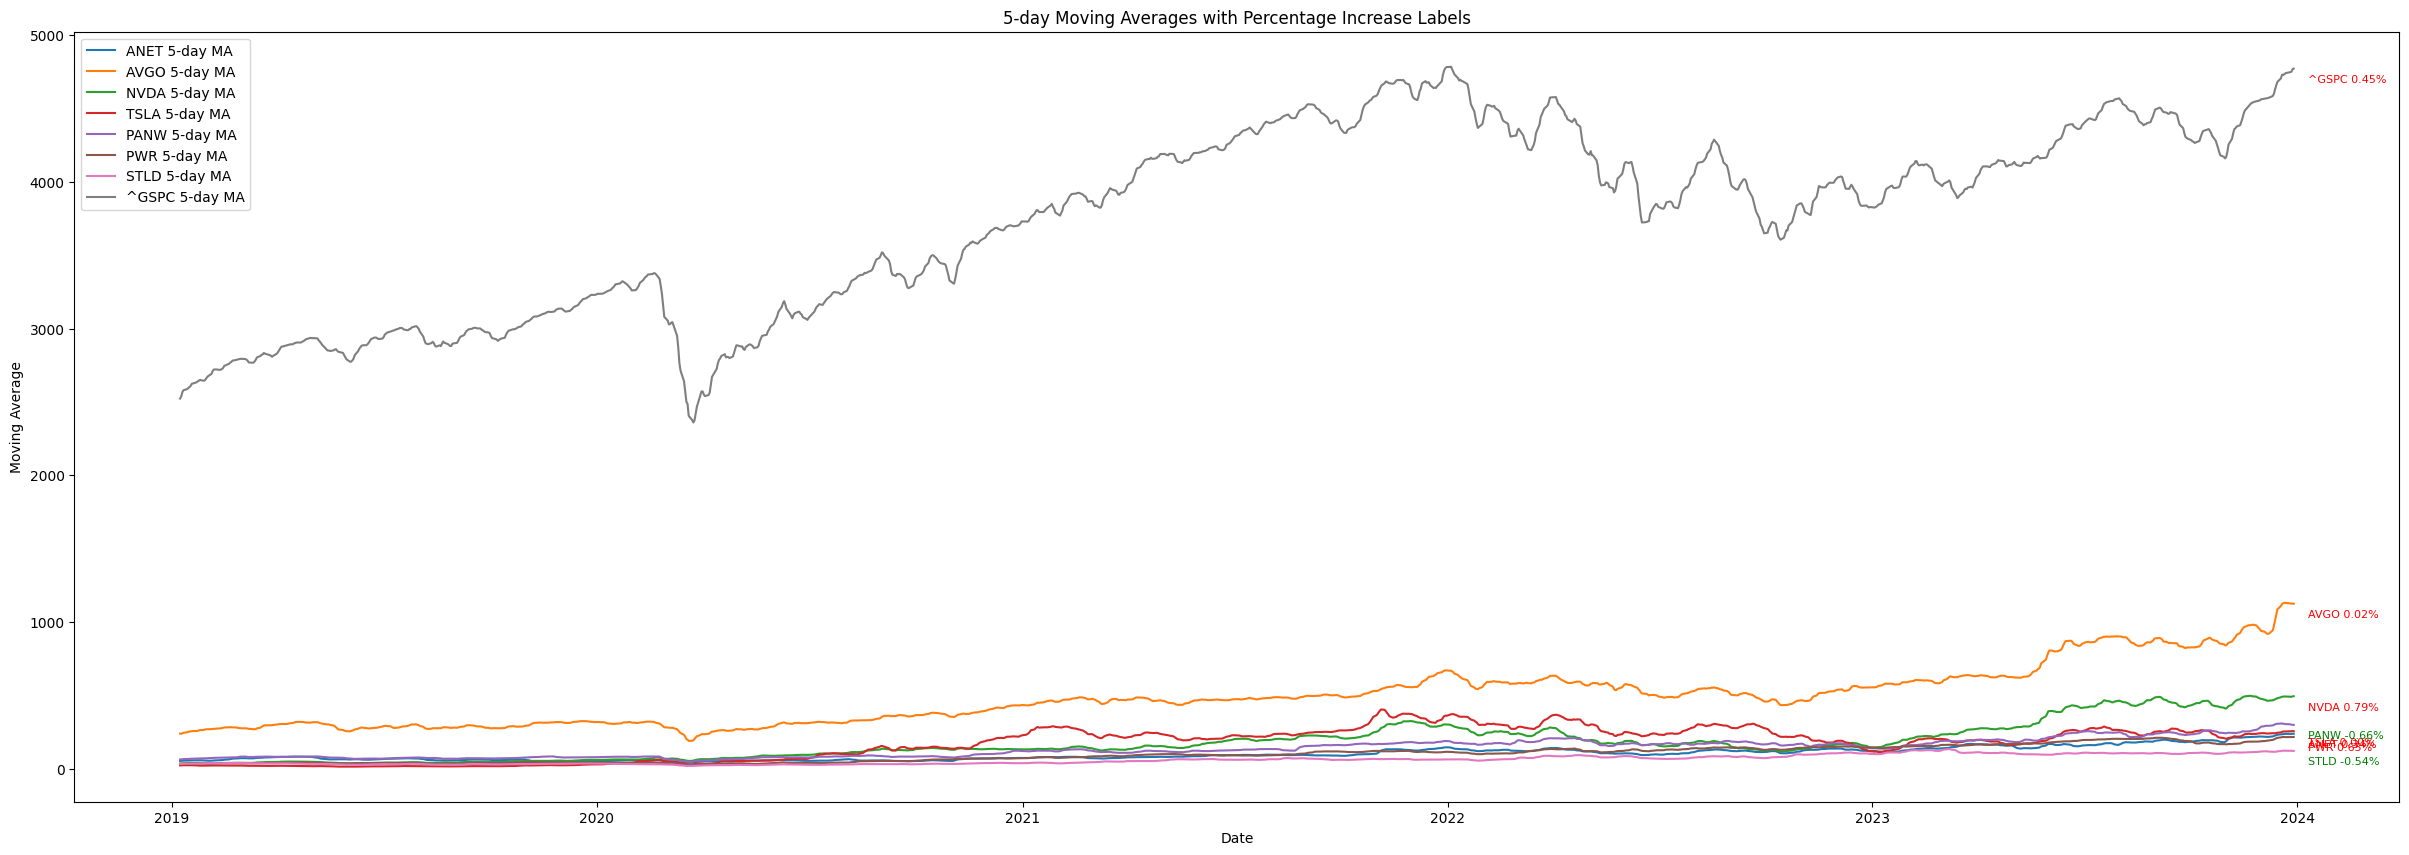

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock prices
tickers = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD', "^GSPC"]
closing_prices = yf.download(tickers, start="2019-01-01", end="2024-01-01")['Close']

# Calculate 5-day moving averages
ma_window = 5
moving_averages = closing_prices.rolling(window=ma_window).mean()

# Calculate future 5-day moving averages (shifted by 1 day for prediction)
future_moving_averages = moving_averages.shift(-1)[:-1]

# Calculate percentage increase
percentage_increase = (future_moving_averages / moving_averages.shift(1)[:-1] - 1) * 100

# Plotting
plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(closing_prices[ticker], label=ticker)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')

plt.figure(figsize=(30,10))

for ticker in tickers:
    plt.plot(moving_averages[ticker], label=f'{ticker} {ma_window}-day MA')

    # Annotate with percentage increase
    last_value = moving_averages[ticker].iloc[-1]
    percentage_inc = percentage_increase[ticker].iloc[-1]

    # Check if percentage_inc is not NaN before annotating
    if not pd.isna(percentage_inc):
        plt.annotate(f'{ticker} {percentage_inc:.2f}%',
                     xy=(moving_averages.index[-1], last_value),
                     xytext=(10, -10),
                     textcoords='offset points',
                     fontsize=8,
                     color='red' if percentage_inc > 0 else 'green')

plt.title(f'{ma_window}-day Moving Averages with Percentage Increase Labels')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend(loc='upper left')

plt.show()


[*********************100%%**********************]  8 of 8 completed


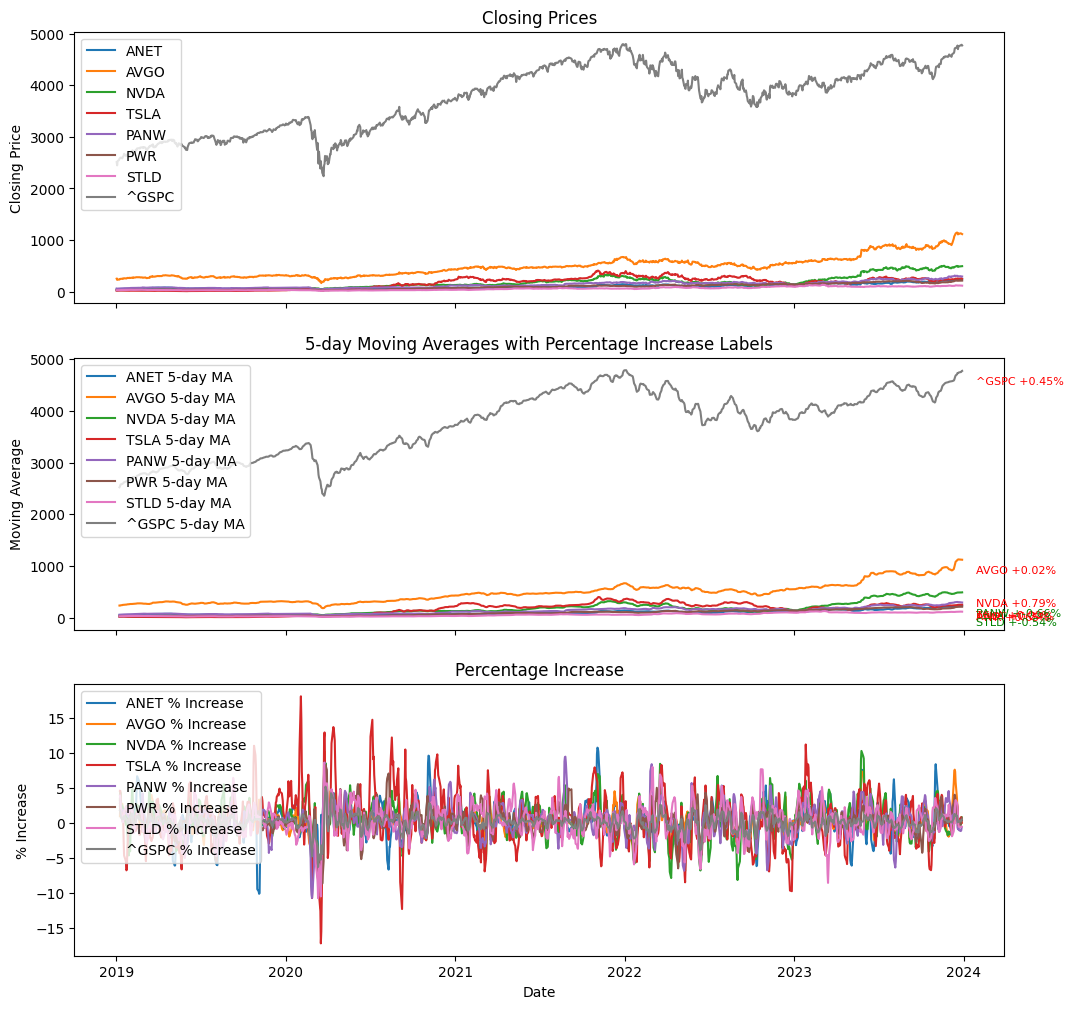

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock prices
tickers = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD', "^GSPC"]
closing_prices = yf.download(tickers, start="2019-01-01", end="2024-01-01")['Close']

# Calculate 5-day moving averages
ma_window = 5
moving_averages = closing_prices.rolling(window=ma_window).mean()

# Calculate future 5-day moving averages (shifted by 1 day for prediction)
future_moving_averages = moving_averages.shift(-1)[:-1]

# Calculate percentage increase
percentage_increase = (future_moving_averages / moving_averages.shift(1)[:-1] - 1) * 100

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot Closing Prices
for ticker in tickers:
    ax1.plot(closing_prices[ticker], label=ticker)

ax1.set_title('Closing Prices')
ax1.set_ylabel('Closing Price')
ax1.legend(loc='upper left')

# Plot Moving Averages
for ticker in tickers:
    ax2.plot(moving_averages[ticker], label=f'{ticker} {ma_window}-day MA')

    # Annotate with percentage increase
    last_value = moving_averages[ticker].iloc[-1]
    percentage_inc = percentage_increase[ticker].iloc[-1]

    # Check if percentage_inc is not NaN before annotating
    if not pd.isna(percentage_inc):
        ax2.annotate(f'{ticker} +{percentage_inc:.2f}%',
                     xy=(moving_averages.index[-1], last_value),
                     xytext=(10, -10),
                     textcoords='offset points',
                     fontsize=8,
                     color='red' if percentage_inc > 0 else 'green')

ax2.set_title(f'{ma_window}-day Moving Averages with Percentage Increase Labels')
ax2.set_ylabel('Moving Average')
ax2.legend(loc='upper left')

# Plot Percentage Increases
for ticker in tickers:
    ax3.plot(percentage_increase[ticker], label=f'{ticker} % Increase')

ax3.set_title('Percentage Increase')
ax3.set_xlabel('Date')
ax3.set_ylabel('% Increase')
ax3.legend(loc='upper left')

plt.show()


In [ ]:
future_moving_averages = moving_averages.shift(-1)[:-1]

# Calculate percentage increase
percentage_increase = (future_moving_averages / moving_averages.shift(1)[:-1] - 1) * 100

# Calculate percentage increase from start to end
start_prices = closing_prices.iloc[0]
end_prices = closing_prices.iloc[-1]
percentage_increase_start_to_end = ((end_prices / start_prices) - 1) * 100

# Display percentage increase table
percentage_table = pd.DataFrame({'Ticker': tickers, 'Start Price': start_prices, 'End Price': end_prices, 'Percentage Increase': percentage_increase_start_to_end})
percentage_table = percentage_table.sort_values(by='Percentage Increase', ascending=False)

print(percentage_table)

       Ticker  Start Price    End Price  Percentage Increase
Ticker                                                      
NVDA     NVDA    34.055000   495.220001          1354.177057
TSLA     STLD    20.674667   248.479996          1101.857285
PWR      PANW    29.920000   215.800003           621.256693
PANW     TSLA    61.070000   294.880005           382.855750
ANET     ANET    52.637501   235.509995           347.418648
AVGO     AVGO   253.509995  1116.250000           340.317946
STLD      PWR    30.450001   118.099998           287.848918
^GSPC   ^GSPC  2510.030029  4769.830078            90.030797


In [ ]:
annual_percentage_increase = (closing_prices.resample('Y').last() / closing_prices.resample('Y').first() - 1) * 100

# Display annual percentage increase
print(annual_percentage_increase)

Ticker            ANET        AVGO        NVDA        PANW        PWR  \
Date                                                                    
2019-12-31   -3.395872   24.657803   72.735282   26.221281  36.062831   
2020-12-31   41.935329   35.813762  117.664959   50.966396  75.273780   
2021-12-31  103.065402   56.486048  124.280320   58.323382  68.000005   
2022-12-31  -14.686450  -15.707351  -51.482353  -23.077493  26.926164   
2023-12-31   94.781232  101.678478  245.944829  112.986646  53.474150   

Ticker           STLD        TSLA      ^GSPC  
Date                                          
2019-12-31  11.789820   34.892938  28.714796  
2020-12-31   9.082840  720.050647  15.292907  
2021-12-31  69.497546   44.810012  28.793058  
2022-12-31  58.449558  -69.199353 -19.953051  
2023-12-31  24.093728  129.861239  24.729487  


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Download stock prices
tickers = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD', "^GSPC"]
closing_prices = yf.download(tickers, start="2019-01-01", end="2024-01-01")['Close']

# Calculate 1-year returns
returns_1year = (closing_prices / closing_prices.shift(252) - 1) * 100  # Assuming 252 trading days in a year

# Create a DataFrame for features and target
features = returns_1year[tickers].shift(1)  # Use returns from the previous day as features
target = returns_1year[tickers]

# Drop NaN values
features = features.dropna()
target = target.dropna()

# Drop the last row from either features or target to align the dimensions
if len(features) > len(target):
    features = features[:-1]
elif len(target) > len(features):
    target = target[:-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Predict the next 1-year returns
features_future = returns_1year[tickers].iloc[-1].values.reshape(1, -1)
predicted_returns = model.predict(features_future)

print("Predicted 1-year returns:")
for i, ticker in enumerate(tickers):
    print(f'{ticker}: {predicted_returns[0, i]:.2f}%')


[*********************100%%**********************]  8 of 8 completed


Mean Squared Error: 3.312174587787813e-27
Predicted 1-year returns:
ANET: 97.63%
AVGO: 104.86%
NVDA: 252.82%
TSLA: 120.46%
PANW: 114.72%
PWR: 52.70%
STLD: 18.23%
^GSPC: 26.08%


[*********************100%%**********************]  8 of 8 completed


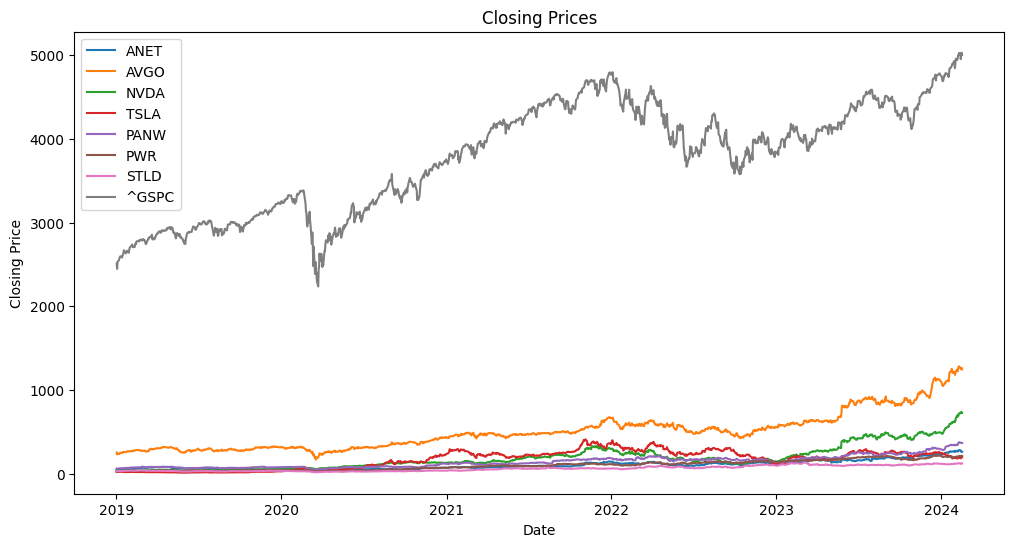

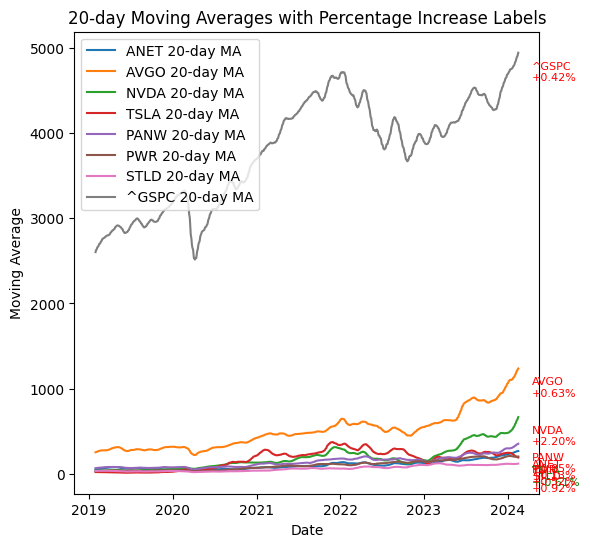

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock prices
tickers = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD', "^GSPC"]
closing_prices = yf.download(tickers, start="2019-01-01", end="2024-12-31")['Close']

# Calculate 20-day moving averages
ma_window = 20
moving_averages_20 = closing_prices.rolling(window=ma_window).mean()

# Calculate future 20-day moving averages (shifted by 1 day for prediction)
future_moving_averages_20 = moving_averages_20.shift(-1)[:-1]

# Calculate percentage increase
percentage_increase_20 = (future_moving_averages_20 / moving_averages_20.shift(1)[:-1] - 1) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Prices
for ticker in tickers:
    plt.plot(closing_prices[ticker], label=ticker)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')

plt.figure(figsize=(6, 6))

# Plot 20-day Moving Averages
for ticker in tickers:
    plt.plot(moving_averages_20[ticker], label=f'{ticker} {ma_window}-day MA')

    # Annotate with percentage increase
    last_value_20 = moving_averages_20[ticker].iloc[-1]
    percentage_inc_20 = percentage_increase_20[ticker].iloc[-1]

    # Check if percentage_inc is not NaN before annotating
    if not pd.isna(percentage_inc_20):
        plt.annotate(f'{ticker}\n+{percentage_inc_20:.2f}%',
                     xy=(moving_averages_20.index[-1], last_value_20),
                     xytext=(10, -20),
                     textcoords='offset points',
                     fontsize=8,
                     color='red' if percentage_inc_20 > 0 else 'green')

plt.title(f'{ma_window}-day Moving Averages with Percentage Increase Labels')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend(loc='upper left')

plt.show()



[*********************100%%**********************]  8 of 8 completed


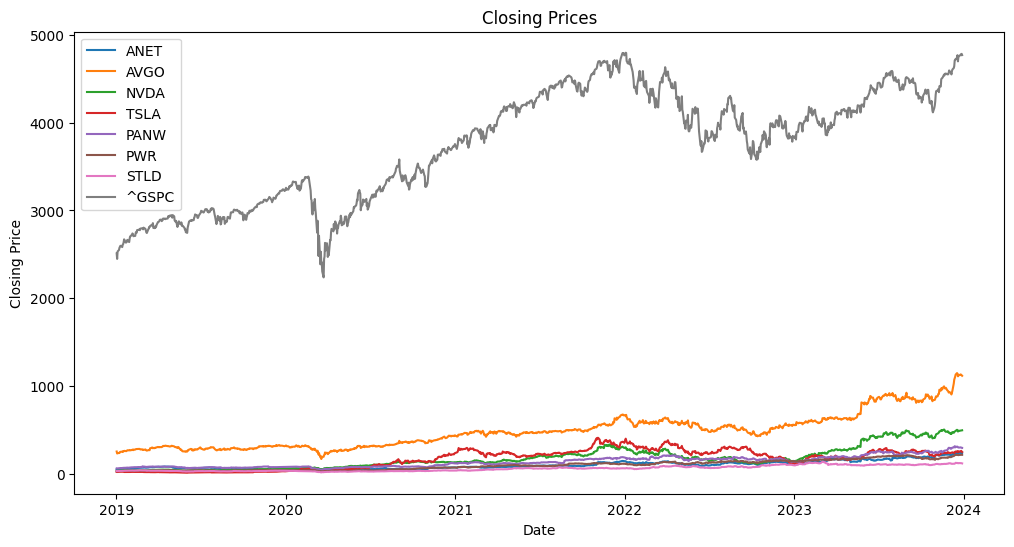

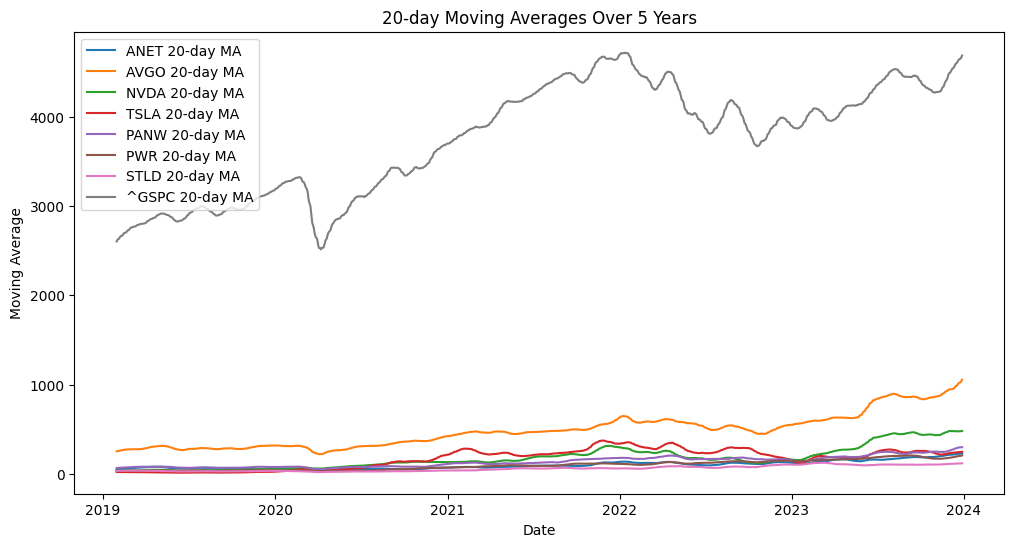

            ANET 20-day MA  AVGO 20-day MA  NVDA 20-day MA  TSLA 20-day MA  \
Date                                                                         
2019-01-02             NaN             NaN             NaN             NaN   
2019-01-03             NaN             NaN             NaN             NaN   
2019-01-04             NaN             NaN             NaN             NaN   
2019-01-07             NaN             NaN             NaN             NaN   
2019-01-08             NaN             NaN             NaN             NaN   
...                    ...             ...             ...             ...   
2023-12-22      225.499001     1018.705493      477.321498      244.503500   
2023-12-26      226.442001     1027.787994      477.839998      245.529999   
2023-12-27      227.466000     1036.778998      478.637999      246.265999   
2023-12-28      228.349500     1045.857999      479.328999      246.717999   
2023-12-29      229.139500     1055.384000      480.704999      

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock prices
tickers = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD', "^GSPC"]
closing_prices = yf.download(tickers, start="2019-01-01", end="2024-01-01")['Close']

# Calculate 20-day moving averages for each day
ma_window = 20
moving_averages = closing_prices.rolling(window=ma_window).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Prices
for ticker in tickers:
    plt.plot(closing_prices[ticker], label=ticker)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')

plt.figure(figsize=(12, 6))

# Plot 20-day Moving Averages
for ticker in tickers:
    plt.plot(moving_averages[ticker], label=f'{ticker} {ma_window}-day MA')

plt.title(f'{ma_window}-day Moving Averages Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend(loc='upper left')

plt.show()

# Create a table of 20-day moving averages
ma_table = pd.DataFrame(index=closing_prices.index)
for ticker in tickers:
    ma_table[f'{ticker} {ma_window}-day MA'] = closing_prices[ticker].rolling(window=ma_window).mean()

# Display the table
print(ma_table)


[*********************100%%**********************]  8 of 8 completed


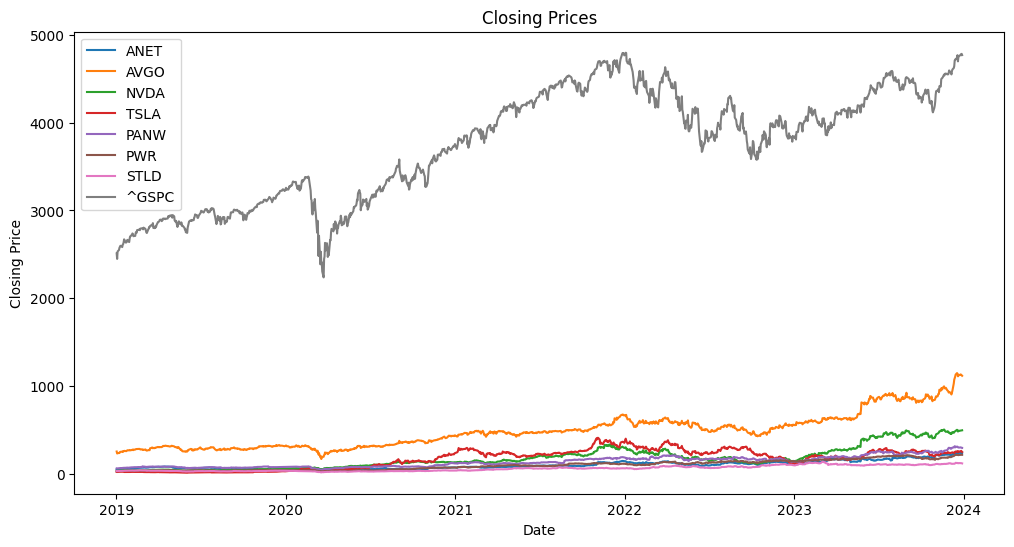

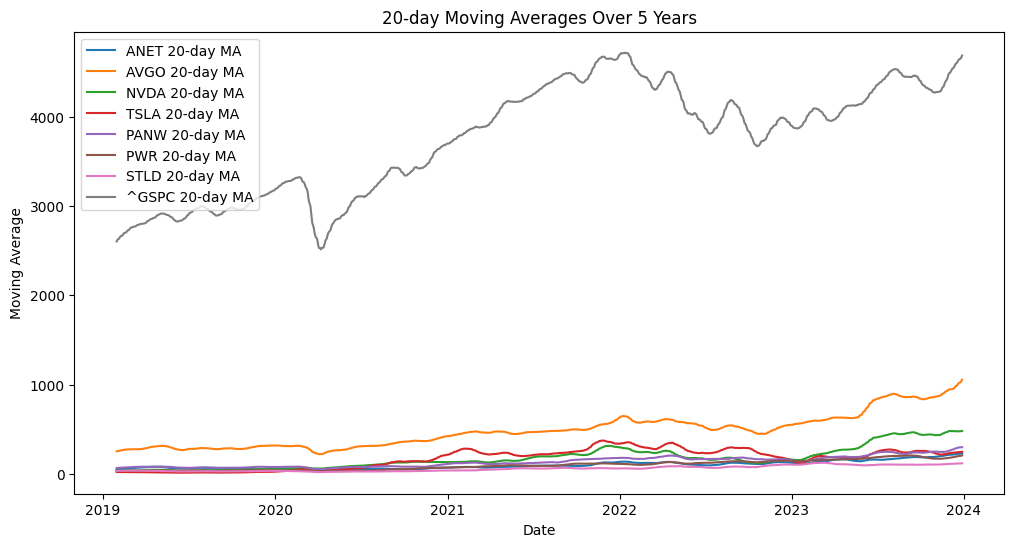

            ANET 20-day MA  AVGO 20-day MA  NVDA 20-day MA  TSLA 20-day MA  \
Date                                                                         
2019-01-30       54.169750      253.269500       36.264000       21.271200   
2019-01-31       54.222625      254.006500       36.358125       21.260867   
2019-02-01       54.483875      255.799000       36.567375       21.300367   
2019-02-04       54.683375      257.743500       36.729749       21.284367   
2019-02-05       54.859750      259.344500       36.811625       21.239000   
...                    ...             ...             ...             ...   
2023-12-22      225.499001     1018.705493      477.321498      244.503500   
2023-12-26      226.442001     1027.787994      477.839998      245.529999   
2023-12-27      227.466000     1036.778998      478.637999      246.265999   
2023-12-28      228.349500     1045.857999      479.328999      246.717999   
2023-12-29      229.139500     1055.384000      480.704999      

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock prices
tickers = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD', "^GSPC"]
closing_prices = yf.download(tickers, start="2019-01-01", end="2024-01-01")['Close']

# Calculate 20-day moving averages for each day
ma_window = 20
moving_averages = closing_prices.rolling(window=ma_window).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Prices
for ticker in tickers:
    plt.plot(closing_prices[ticker], label=ticker)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')

plt.figure(figsize=(12, 6))

# Plot 20-day Moving Averages
for ticker in tickers:
    plt.plot(moving_averages[ticker], label=f'{ticker} {ma_window}-day MA')

plt.title(f'{ma_window}-day Moving Averages Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend(loc='upper left')

plt.show()

# Create a DataFrame for 20-day moving averages and drop null values
ma_df = pd.DataFrame(index=closing_prices.index)
for ticker in tickers:
    ma_df[f'{ticker} {ma_window}-day MA'] = closing_prices[ticker].rolling(window=ma_window).mean()

ma_df = ma_df.dropna()

# Display the DataFrame
print(ma_df)


In [ ]:
ma_df = pd.DataFrame(index=closing_prices.index)
for ticker in tickers:
    ma_df[f'{ticker} {ma_window}-day MA'] = closing_prices[ticker].rolling(window=ma_window).mean()
    ma_df[f'{ticker} % Change'] = closing_prices[ticker].pct_change() * 100

ma_df = ma_df.dropna()

# Display the DataFrame
ma_df

,ANET 20-day MA,ANET % Change,AVGO 20-day MA,AVGO % Change,NVDA 20-day MA,NVDA % Change,TSLA 20-day MA,TSLA % Change,PANW 20-day MA,PANW % Change,PWR 20-day MA,PWR % Change,STLD 20-day MA,STLD % Change,^GSPC 20-day MA,^GSPC % Change
Date,,,,,,,,,,,,,,,,
2019-01-30,54.169750,1.850599,253.269500,1.689697,36.264000,4.399691,21.271200,3.802190,66.155167,2.945300,32.6160,0.802289,33.599000,2.702706,2602.554492,1.554926
2019-01-31,54.222625,2.159434,254.006500,-0.948972,36.358125,4.629158,21.260867,-0.566766,66.682001,0.920796,32.8870,0.454803,33.906000,-0.732503,2612.257996,0.859740
2019-02-01,54.483875,2.663191,255.799000,-0.536814,36.567375,0.681736,21.300367,1.690438,67.358167,2.537006,33.1340,-2.405202,34.265500,1.530477,2625.190002,0.089861
2019-02-04,54.683375,-0.938779,257.743500,1.990179,36.729749,3.074689,21.284367,0.217805,67.954334,-0.049939,33.3140,0.811826,34.564000,0.969036,2634.836511,0.677624
2019-02-05,54.859750,2.563753,259.344500,-0.779066,36.811625,0.516158,21.239000,2.703822,68.480667,-0.558679,33.4805,-0.431411,34.813000,-1.759530,2644.237012,0.470842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,225.499001,1.240757,1018.705493,-0.471046,477.321498,-0.326599,244.503500,-0.770140,296.376996,-0.397462,200.8150,0.748410,117.789999,1.372821,4640.760986,0.166006
2023-12-26,226.442001,-0.306386,1027.787994,0.883263,477.839998,0.919521,245.529999,1.611623,297.963496,0.875228,202.2625,0.289670,118.089999,-0.484239,4651.976978,0.423169
2023-12-27,227.466000,0.084199,1036.778998,-0.505347,478.637999,0.280039,246.265999,1.882241,298.946997,-1.103652,203.9930,0.600947,118.423499,-0.288659,4663.311475,0.143046


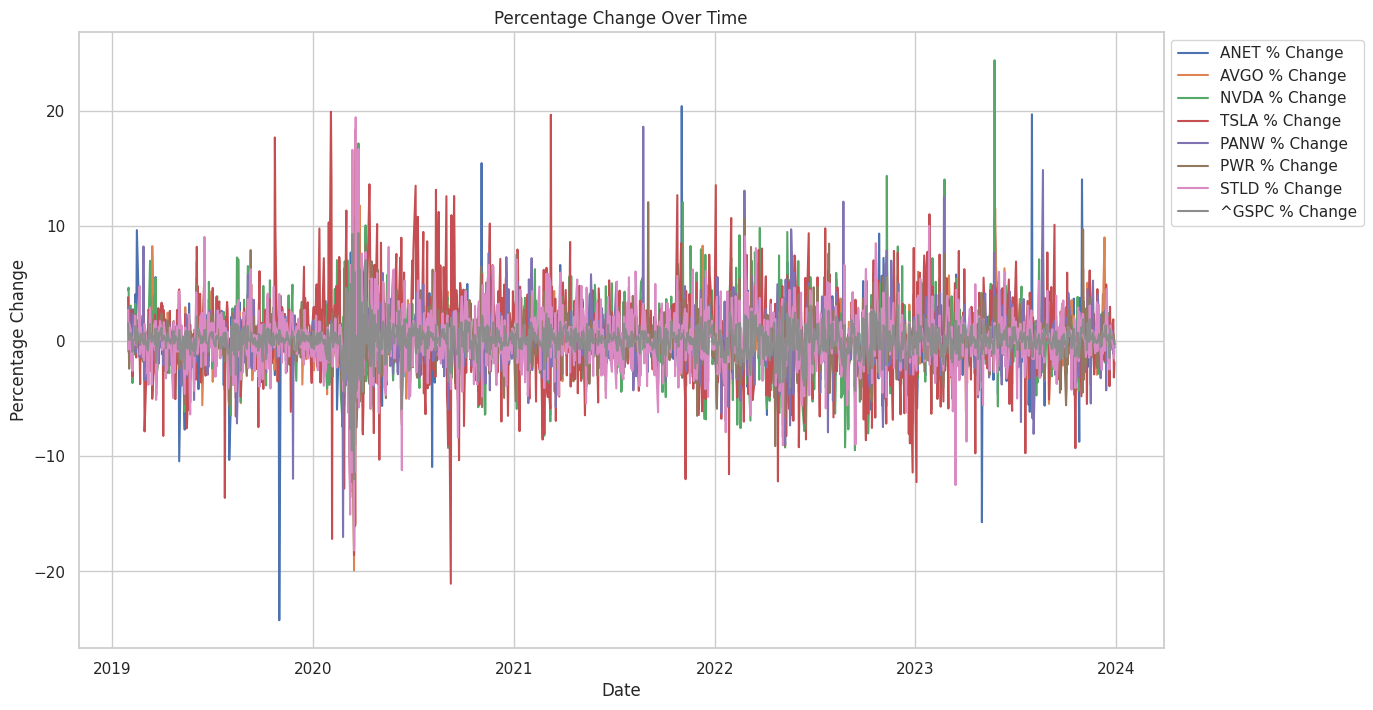

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ma_df is your DataFrame with 20-day MA and percentage change columns
# Make sure to replace this with your actual DataFrame
# For example, you can load the DataFrame from the previous code snippets

# Create a list of columns with percentage change
percentage_columns = [col for col in ma_df.columns if ' % Change' in col]

# Plot lineplots for all percentage change columns
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

for col in percentage_columns:
    sns.lineplot(data=ma_df, x=ma_df.index, y=col, label=col)

plt.title('Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [ ]:
pip install yfinance pandas numpy scikit-learn tensorflow


[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
12/12 [==============================] - 3s 100ms/step - loss: 0.1398 - val_loss: 0.1393
Epoch 2/10
12/12 [==============================] - 1s 52ms/step - loss: 0.0648 - val_loss: 0.0118
Epoch 3/10
12/12 [==============================] - 1s 57ms/step - loss: 0.0076 - val_loss: 0.0095
Epoch 4/10
12/12 [==============================] - 1s 54ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 5/10
12/12 [==============================] - 1s 59ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 6/10
12/12 [==============================] - 1s 61ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 7/10
12/12 [==============================] - 1s 59ms/step - loss: 0.0036 - val_loss: 0.0048
Epoch 8/10
12/12 [==============================] - 1s 57ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 9/10
12/12 [==============================] - 1s 88ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 10/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0030
Model Loss: 0.002992042107507

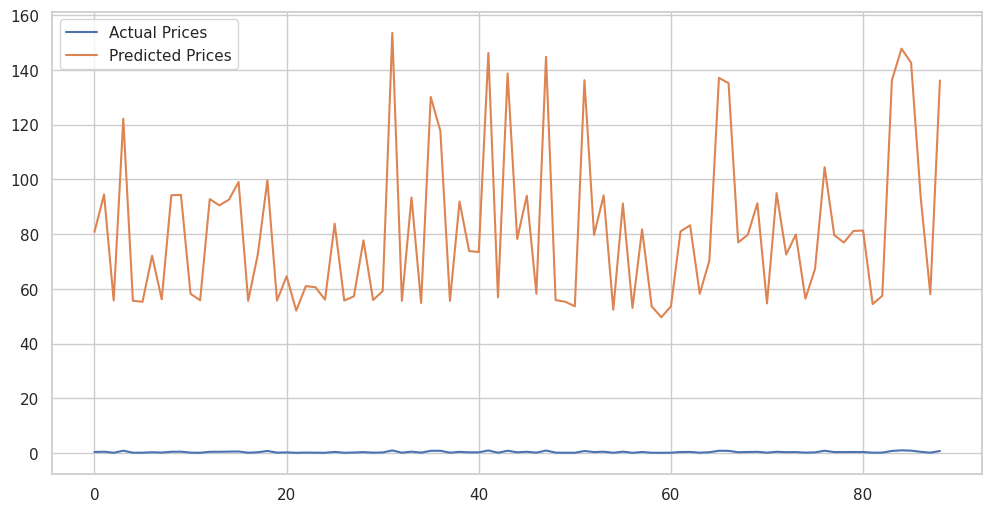

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Function to fetch stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Close'].values.reshape(-1, 1)

# Function to create LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    x, y = [], []
    for i in range(len(data)-time_steps):
        x.append(data[i:(i+time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Main function
def main():
    start_date = '2020-01-01'
    end_date = '2022-01-01'
    time_steps = 60  # Adjust this parameter based on your needs

    # Fetch stock data for the first symbol in the list
    stock_symbol = stocks[0]
    stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_data = scaler.fit_transform(stock_data)

    # Prepare data for LSTM
    x, y = prepare_data(normalized_data, time_steps)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Reshape the data for LSTM input
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Create and train the LSTM model
    input_shape = (x_train.shape[1], 1)
    model = create_lstm_model(input_shape)
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

    # Evaluate the model
    loss = model.evaluate(x_test, y_test)
    print(f'Model Loss: {loss}')

    # Make predictions
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
f

NameError: name 'f' is not defined

In [ ]:
# prompt: import label encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()


ARIMA MODEL

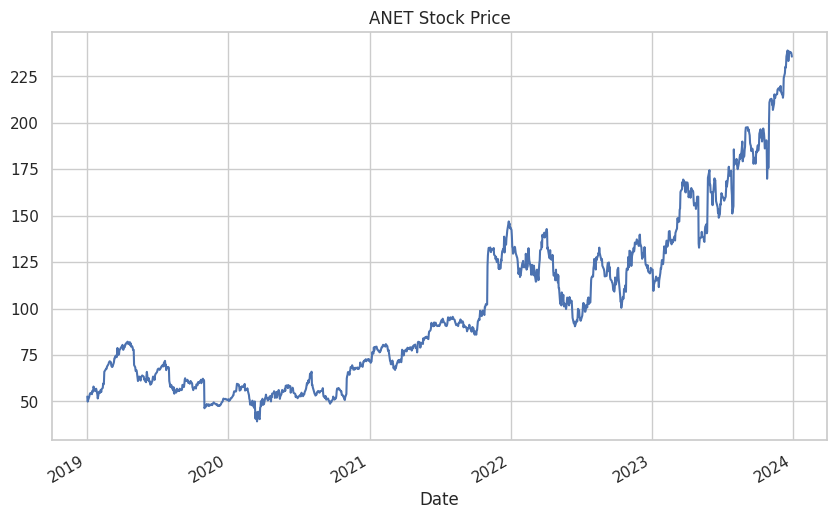

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "




Summary for ANET:
                               SARIMAX Results                                
Dep. Variable:                   ANET   No. Observations:                 1258
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3107.562
Date:                Tue, 20 Feb 2024   AIC                           6237.123
Time:                        06:55:06   BIC                           6293.625
Sample:                             0   HQIC                          6258.358
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2139      0.178      6.811      0.000       0.865       1.563
ar.L2         -0.6127      0.376     -1.630      0.103      -1.350       0.124
ar.L3         -0.6796      0.474

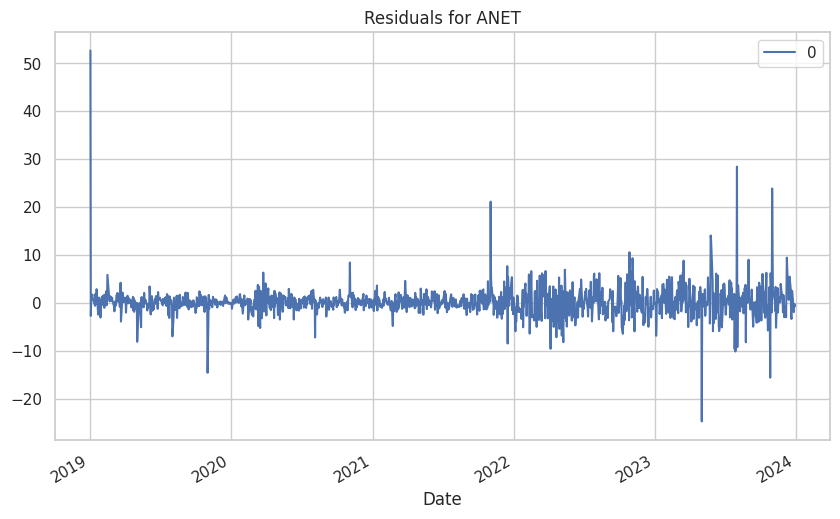

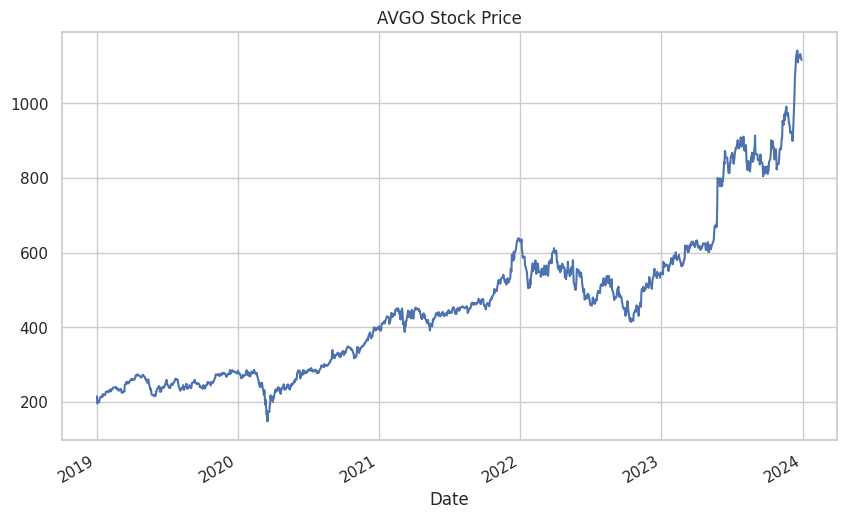

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "




Summary for AVGO:
                               SARIMAX Results                                
Dep. Variable:                   AVGO   No. Observations:                 1258
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -4734.908
Date:                Tue, 20 Feb 2024   AIC                           9491.816
Time:                        06:55:11   BIC                           9548.318
Sample:                             0   HQIC                          9513.051
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3701      0.313     -1.182      0.237      -0.984       0.244
ar.L2         -0.0123      0.291     -0.042      0.966      -0.582       0.558
ar.L3         -0.6736      0.148

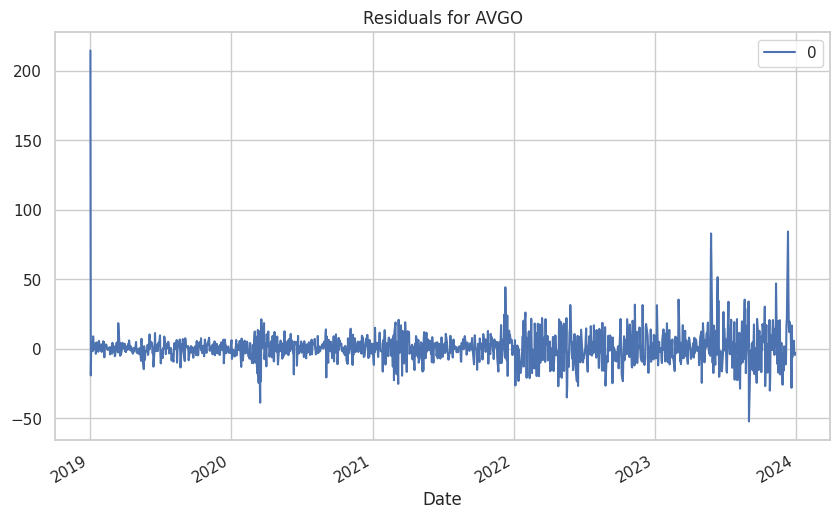

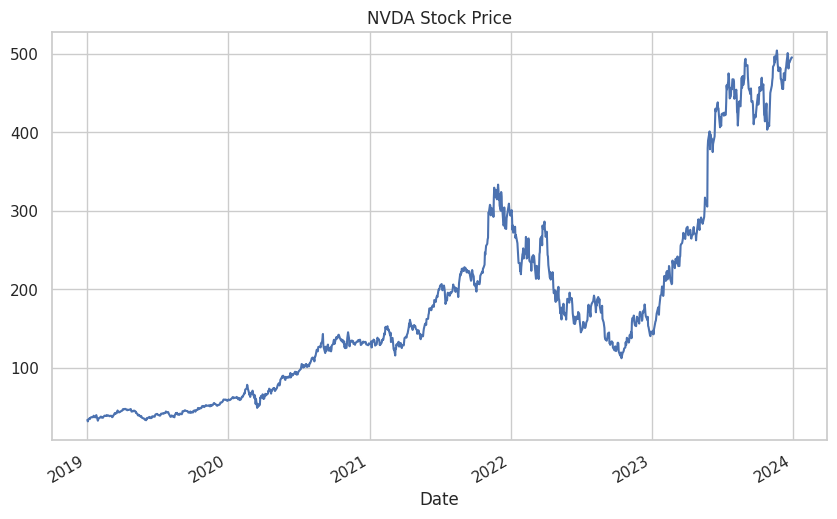

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "




Summary for NVDA:
                               SARIMAX Results                                
Dep. Variable:                   NVDA   No. Observations:                 1258
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -4130.408
Date:                Tue, 20 Feb 2024   AIC                           8282.816
Time:                        06:55:18   BIC                           8339.317
Sample:                             0   HQIC                          8304.051
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0248      0.206     -0.120      0.904      -0.428       0.379
ar.L2          0.5682      0.160      3.553      0.000       0.255       0.882
ar.L3         -0.5434      0.115

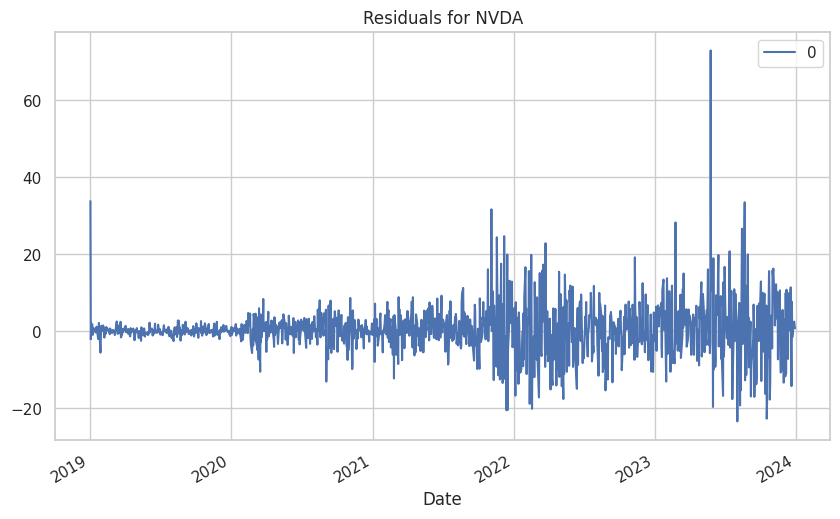

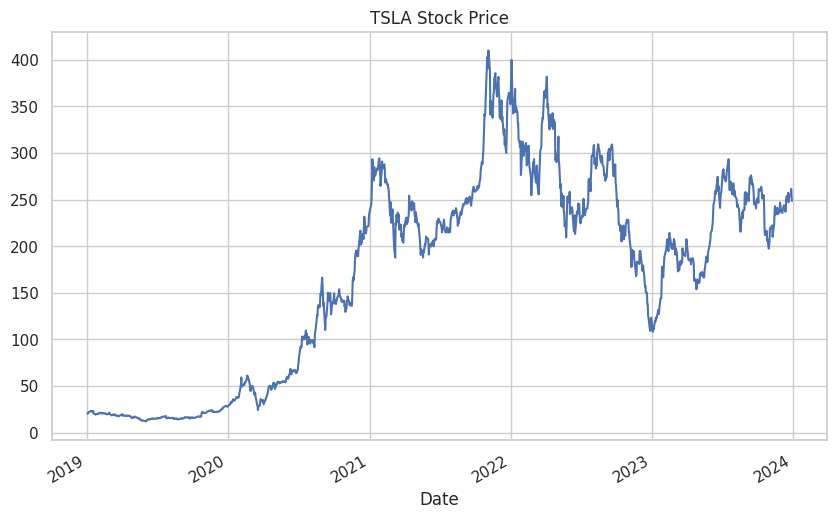

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "




Summary for TSLA:
                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 1258
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -4326.220
Date:                Tue, 20 Feb 2024   AIC                           8674.440
Time:                        06:55:26   BIC                           8730.941
Sample:                             0   HQIC                          8695.675
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5668      4.410     -0.129      0.898      -9.211       8.077
ar.L2         -0.0691      2.666     -0.026      0.979      -5.295       5.156
ar.L3          0.7226      0.388

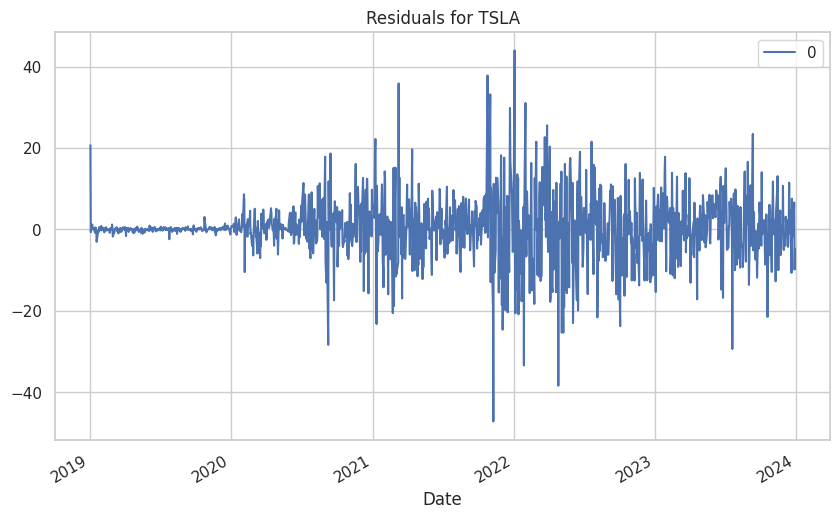

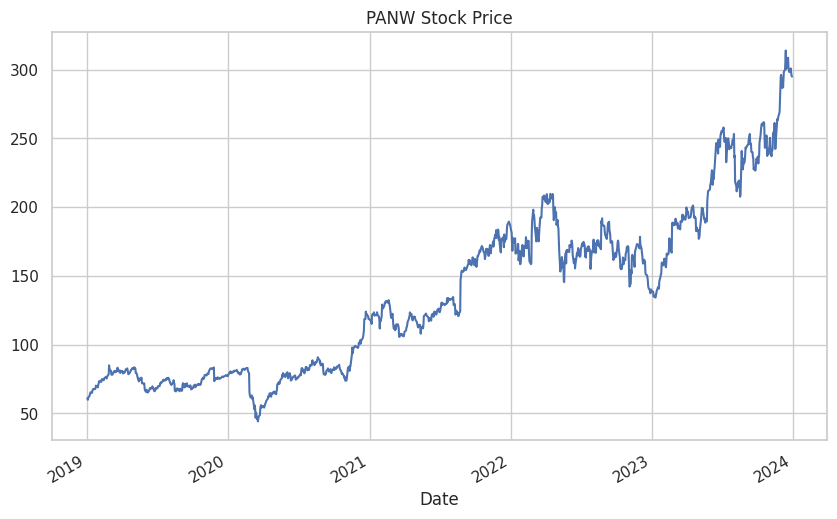

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "




Summary for PANW:
                               SARIMAX Results                                
Dep. Variable:                   PANW   No. Observations:                 1258
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3418.081
Date:                Tue, 20 Feb 2024   AIC                           6858.161
Time:                        06:55:37   BIC                           6914.663
Sample:                             0   HQIC                          6879.396
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4336      0.480     -0.904      0.366      -1.374       0.507
ar.L2          0.0455      0.240      0.190      0.849      -0.424       0.515
ar.L3          0.0732      0.200

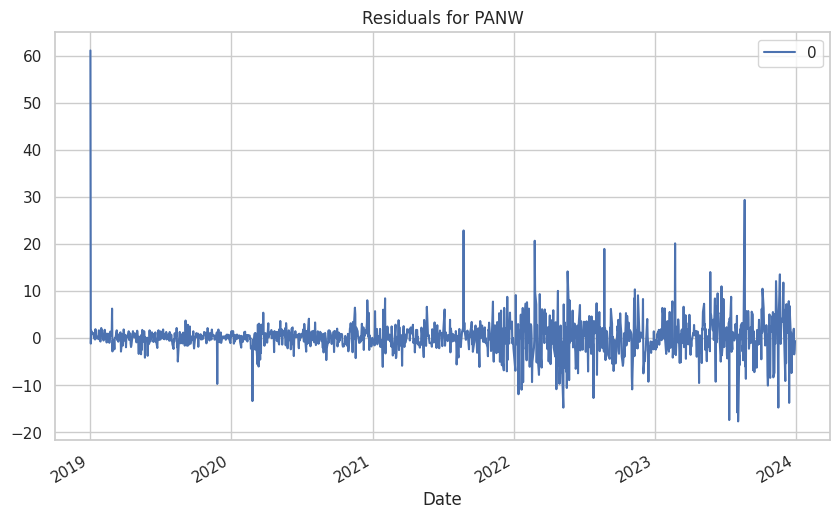

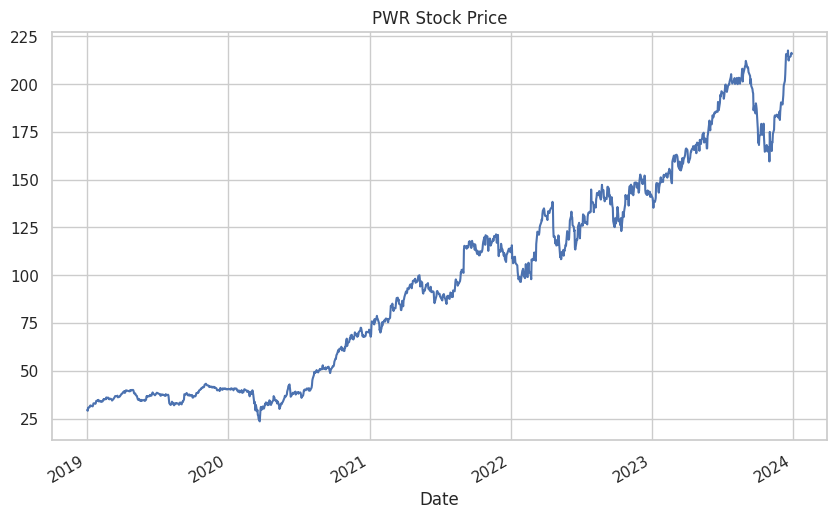

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)




Summary for PWR:
                               SARIMAX Results                                
Dep. Variable:                    PWR   No. Observations:                 1258
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -2755.873
Date:                Tue, 20 Feb 2024   AIC                           5533.746
Time:                        06:55:41   BIC                           5590.248
Sample:                             0   HQIC                          5554.981
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6971      0.419      1.665      0.096      -0.123       1.518
ar.L2         -0.0054      0.633     -0.009      0.993      -1.245       1.234
ar.L3          0.2485      0.545 

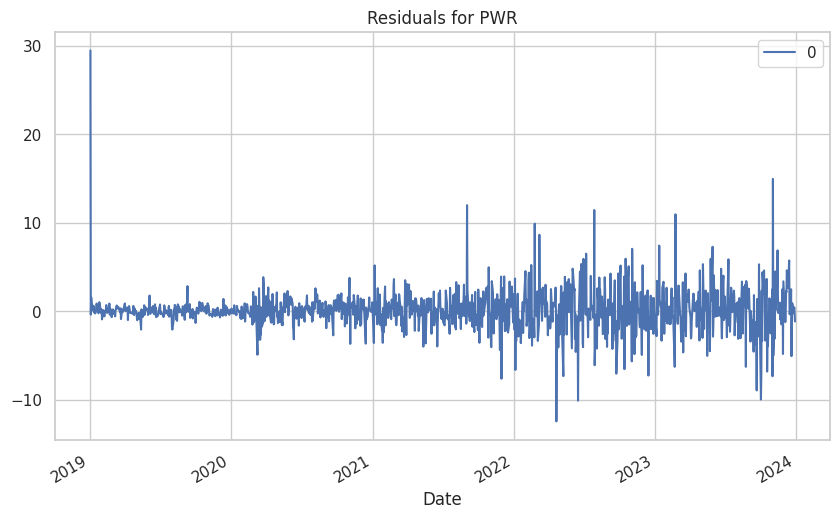

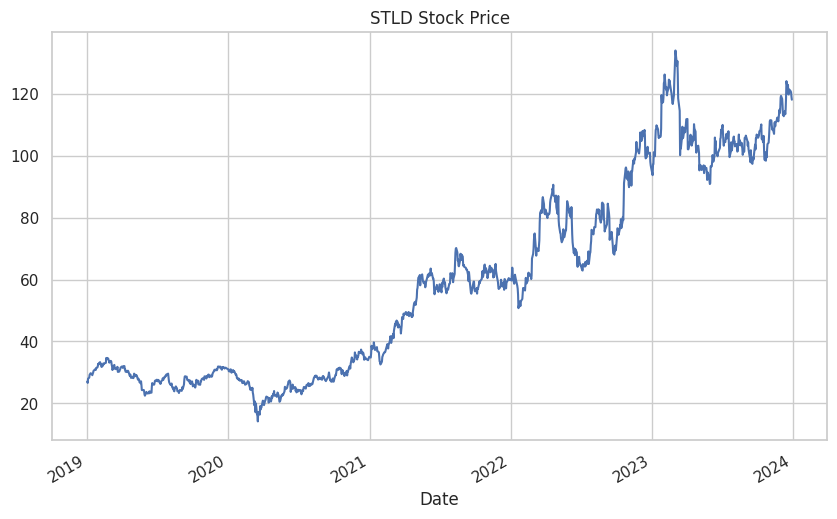

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "




Summary for STLD:
                               SARIMAX Results                                
Dep. Variable:                   STLD   No. Observations:                 1258
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -2430.244
Date:                Tue, 20 Feb 2024   AIC                           4882.488
Time:                        06:55:47   BIC                           4938.989
Sample:                             0   HQIC                          4903.723
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3807      0.336     -1.135      0.257      -1.038       0.277
ar.L2          1.3281      0.040     33.010      0.000       1.249       1.407
ar.L3          0.6975      0.428

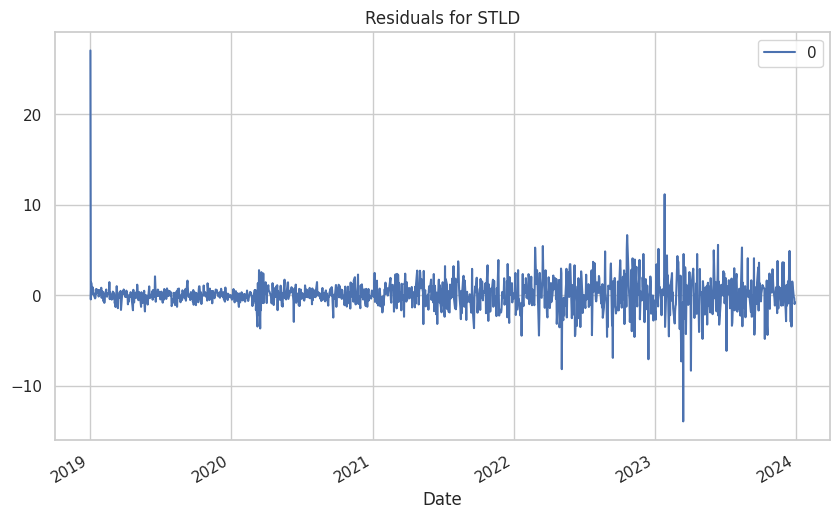

In [ ]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Download stock data
stocks = ['ANET', 'AVGO', 'NVDA', 'TSLA', 'PANW', 'PWR', 'STLD']
df = yf.download(stocks, start="2019-01-01", end="2024-01-01", progress=False)

# Iterate through all stocks
for stock_symbol in stocks:
    stock_data = df['Adj Close'][stock_symbol].dropna()

    # Plot the stock data
    stock_data.plot(figsize=(10, 6))
    plt.title(f'{stock_symbol} Stock Price')
    plt.show()

    # Fit ARIMA model
    order = (5, 1, 5)  # Example order, you may need to adjust these parameters
    model = ARIMA(stock_data, order=order)
    fit_model = model.fit()

    # Print model summary
    print(f'\n\nSummary for {stock_symbol}:')
    print(fit_model.summary())

    # Plot the residuals
    residuals = pd.DataFrame(fit_model.resid)
    residuals.plot(figsize=(10, 6))
    plt.title(f'Residuals for {stock_symbol}')
    plt.show()


In [ ]:
#trail
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

# Download historical stock data for multiple stocks using Yahoo Finance
ticker_symbols = ['AAPL', 'GOOGL', 'MSFT']  # Add more stock symbols as needed
start_date = '2010-01-01'
end_date = '2021-01-01'

# Download and combine data for multiple stocks
data = pd.concat([yf.download(symbol, start=start_date, end=end_date)['Adj Close'] for symbol in ticker_symbols], axis=1)
data.columns = ticker_symbols

# Preprocess the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.80)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])
        y.append(data[i+seq_length, :])
    return np.array(X), np.array(y)

seq_length = 10  # Adjust the sequence length as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build and train individual LSTM models for each stock
models = {}
for i, symbol in enumerate(ticker_symbols):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], len(ticker_symbols))))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    models[symbol] = model

    # Train the models
    batch_size = 64  # Adjust batch size as needed
    epochs = 1  # Adjust the number of epochs as needed
    model.fit(X_train, y_train[:, i], batch_size=batch_size, epochs=epochs, verbose=1)
#make predictions
predictions = {}
for symbol in ticker_symbols:
    predictions[symbol] = models[symbol].predict(X_test)
# Inverse transform predictions to original scale
# Inverse transform predictions to original scale
for symbol in ticker_symbols:
    # Reshape predictions array
    reshaped_predictions = predictions[symbol].reshape(-1, 1)
#print(reshaped_predictions.shape)
#print(scaler.min_.shape)
#print(scaler.scale_.shape)
    # Inverse transform and update predictions dictionary
    #predictions[symbol] = scaler.inverse_transform(reshaped_predictions).reshape(-1, 1)
    reshaped_predictions = predictions[symbol].reshape(544,1)
    # Update y_test array
    y_test = y_test.reshape(1632, 1)
    print(y_test.shape)

# Evaluate the models
rmse_values = {}
for symbol in ticker_symbols:
    rmse_values[symbol] = sqrt(mean_squared_error(y_test[:, i], predictions[symbol]))
    print(f'{symbol} RMSE: {rmse_values[symbol]}')

# Visualize the predictions for each stock
plt.figure(figsize=(12, 6))
for symbol in ticker_symbols:
    plt.plot(y_test[:, i], label=f'True Prices - {symbol}')
    plt.plot(predictions[symbol], label=f'{symbol} Predictions')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Prediction for Multiple Stocks')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


17/17 [==============================] - 1s 6ms/step
(1632, 1)
(1632, 1)
(1632, 1)


IndexError: index 2 is out of bounds for axis 1 with size 1